 # **<font color='blue'/>Importation des packages et chargement des données**

---



In [3]:
# pip install shap

In [4]:
# pip install imbalanced-learn

In [5]:
# pip install shapely

In [6]:
# pip install lightgbm

In [7]:
# pip install pyarrow

Importation des packages

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, classification_report, ConfusionMatrixDisplay

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import lightgbm as lgbm

from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer

from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance

import shap
shap.initjs()

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import imblearn
from imblearn.over_sampling import SMOTE

from scipy.stats import kde

from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from numpy import arange

import os,shutil
import cv2
from urllib import request
import glob
import pickle as pk
import re

import zipfile as zf
import tarfile

from PIL import Image
from IPython.core.display import display,HTML

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display


chargement des données

In [2]:
# url="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip"
# request.urlretrieve (url, "Projet+Mise+en+prod+-+home-credit-default-risk.zip")

Dézipper le fichier zip contenant les données dans le dossier :

In [3]:
# with zf.ZipFile('Projet+Mise+en+prod+-+home-credit-default-risk.zip', 'r') as f:
#   f.extractall('Data')

Lire les fichiers csv importés, et les affecter à des DataFrames :

In [4]:
df_app_train             = pd.read_csv("Data/application_train.csv")
# df_app_test              = pd.read_csv("Data/application_test.csv")
df_bureau                = pd.read_csv("Data/bureau.csv")
df_bureau_balance        = pd.read_csv("Data/bureau_balance.csv")
df_credit_card_balance   = pd.read_csv("Data/credit_card_balance.csv")
df_installments_payments = pd.read_csv("Data/installments_payments.csv")
df_previous_application  = pd.read_csv("Data/previous_application.csv")
df_POS_CASH_balance      = pd.read_csv("Data/POS_CASH_balance.csv")
df_sample_submission     = pd.read_csv("Data/sample_submission.csv")

# **<font color='blue'/>Nettoyage des données**

---

## Exploration Data

In [5]:
df_app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Les colonnes de chaque DataFrame

In [6]:
print("application_train -  rows:",df_app_train.shape[0]," columns:", df_app_train.shape[1])
# print("application_test -  rows:",df_app_test.shape[0]," columns:", df_app_test.shape[1])
print("bureau -  rows:",df_bureau.shape[0]," columns:", df_bureau.shape[1])
print("bureau_balance -  rows:",df_bureau_balance.shape[0]," columns:", df_bureau_balance.shape[1])
print("credit_card_balance -  rows:",df_credit_card_balance.shape[0]," columns:", df_credit_card_balance.shape[1])
print("installments_payments -  rows:",df_installments_payments.shape[0]," columns:", df_installments_payments.shape[1])
print("previous_application -  rows:",df_previous_application.shape[0]," columns:", df_previous_application.shape[1])
print("POS_CASH_balance -  rows:",df_POS_CASH_balance.shape[0]," columns:", df_POS_CASH_balance.shape[1])
print("sample_submission -  rows:",df_sample_submission.shape[0]," columns:", df_sample_submission.shape[1])

application_train -  rows: 307511  columns: 122
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8
sample_submission -  rows: 48744  columns: 2


Comparer les colonnes des deux dataframes

In [7]:
# df_app_train.columns.equals(df_app_test.columns)

Comparer les colonnes 

In [8]:
# df1 = df_app_train.columns
# df2 = df_app_test.columns

# df1[~df1.isin(df2)].value_counts()

In [9]:
# df2[~df2.isin(df1)].value_counts()

## Bureau et Bureau Balance

**FUNCTIONS**

There are some useful functions in this section. They will help to understand the problem, exploratory data analysis, pre-processing and so on.

- Reduce Memory Usage
- One-Hot Encoder
- Finding column names and types
- An analyzer for Categorical Variables
- Plotting numerical variables
- Plotting correlations
- Finding high correlations
- Missing Value
- Quantile functions for aggregations
- Rare Encoder

In [10]:
# Reduce Memory Usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = df.select_dtypes(["category", "object"]).columns.tolist()
    # categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Grab Column Names
def grab_col_names(dataframe, cat_th=10, car_th=20, show_date=False):
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]

    #cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    cat_cols = dataframe.select_dtypes(["object", "category"]).columns.tolist()
    
    
    
    num_but_cat = [col for col in dataframe.select_dtypes(["float", "integer"]).columns if dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.select_dtypes(["object", "category"]).columns if dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = dataframe.select_dtypes(["float", "integer"]).columns
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'date_cols: {len(date_cols)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    if show_date == True:
        return date_cols, cat_cols, cat_but_car, num_cols, num_but_cat
    else:
        return cat_cols, cat_but_car, num_cols, num_but_cat

# Categorical Variables & Target
def cat_analyzer(dataframe, variable, target = None):
    print(variable)
    if target == None:
        print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe)}), end="\n\n\n")
    else:
        temp = dataframe[dataframe[target].isnull() == False]
        print(pd.DataFrame({
            "COUNT":dataframe[variable].value_counts(),
            "RATIO":dataframe[variable].value_counts() / len(dataframe),
            "TARGET_COUNT":dataframe.groupby(variable)[target].count(),
            "TARGET_MEAN":temp.groupby(variable)[target].mean(),
            "TARGET_MEDIAN":temp.groupby(variable)[target].median(),
            "TARGET_STD":temp.groupby(variable)[target].std()}), end="\n\n\n")

# Numerical Variables
def corr_plot(data, remove=["Id"], corr_coef = "pearson", figsize=(20, 20)):
    if len(remove) > 0:
        num_cols2 = [x for x in data.columns if (x not in remove)]

    sns.set(font_scale=1.1)
    c = data[num_cols2].corr(method = corr_coef)
    mask = np.triu(c.corr(method = corr_coef))
    plt.figure(figsize=figsize)
    sns.heatmap(c,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)
    plt.show()

# Plot numerical variables
def num_plot(data, num_cols, remove=["Id"], hist_bins=10, figsize=(20, 4)):

    if len(remove) > 0:
        num_cols2 = [x for x in num_cols if (x not in remove)]

    for i in num_cols2:
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        data.hist(str(i), bins=hist_bins, ax=axes[0])
        data.boxplot(str(i), ax=axes[1], vert=False);
        try:
            sns.kdeplot(np.array(data[str(i)]))
        except:
            ValueError

        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()

# Get high correlated variables
def high_correlation(data, remove=['SK_ID_CURR', 'SK_ID_BUREAU'], corr_coef="pearson", corr_value = 0.7):
    if len(remove) > 0:
        cols = [x for x in data.columns if (x not in remove)]
        c = data[cols].corr(method=corr_coef)
    else:
        c = data.corr(method=corr_coef)

    for i in c.columns:
        cr = c.loc[i].loc[(c.loc[i] >= corr_value) | (c.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

# Missing Value
def missing_values(data, plot=False):
    mst = pd.DataFrame(
        {"Num_Missing": data.isnull().sum(), "Missing_Ratio": data.isnull().sum() / data.shape[0]}).sort_values(
        "Num_Missing", ascending=False)
    mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index": "Feature"}, axis=1)

    print("Number of Variables include Missing Values:", mst.shape[0], "\n")

    if mst[mst.Missing_Ratio >= 0.3].shape[0] > 0:
        print("Full Missing Variables:", mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(), axis=1, inplace=True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize=(25, 8))
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
        plt.show()

    print(mst, "\n")
    
    
# Quantile functions for aggregations
def quantile_funcs(percentiles = [0.75, 0.9, 0.99]):
    return [(p, lambda x: x.quantile(p)) for p in percentiles]

# Rare Encoder
def rare_encoder(data, col, rare_perc):
    temp = data[col].value_counts() / len(data) < rare_perc
    data[col] = np.where(~data[col].isin(temp[temp < rare_perc].index), "Rare", data[col])
    
    
    
# Plot of multiple features, with TARGET = 1/0 on the same graph
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df_app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df_app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
#     # Ajouter les annotations sur les barres
#     for p in s.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_xy()
#         plt.annotate("%.2f" % p.get_height() + '%',
#                     (p.get_x()+p.get_width()/2, p.get_height()),
#                     ha='center',
#                     va='center',
#                     xytext=(0, 8),
#                     textcoords='offset points',
#                     fontsize = 10,
#                     )

    plt.show();
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = df_train.loc[df_train['TARGET'] != 0]
    t0 = df_train.loc[df_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw_adjust=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw_adjust=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
#         client = df_train[feature][df_train['SK_ID_CURR'] == 100020].values[0]
#         plt.axvline(client, c='red')
        plt.legend()
    plt.show();

In [11]:
# data = df_train1.head(1000)
# rare_perc=0.4
# temp = data['CODE_GENDER'].value_counts() / len(data) < rare_perc
# data['CODE_GENDER'] = np.where(~data['CODE_GENDER'].isin(temp[temp < rare_perc].index), "Rare", data['CODE_GENDER'])

# data['CODE_GENDER'].value_counts()

In [12]:
df_bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [13]:
df_bureau[df_bureau['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
248486       100001       5896632        Closed      currency 1         -879   
248488       100001       5896634        Active      currency 1         -559   
248489       100001       5896635        Active      currency 1          -49   
248485       100001       5896631        Closed      currency 1         -909   
248487       100001       5896633        Closed      currency 1        -1572   
...             ...           ...           ...             ...          ...   
1010005      456255       5126329        Active      currency 1         -573   
1010006      456255       5126330        Closed      currency 1        -1021   
1010008      456255       5126332        Active      currency 1         -378   
1010010      456255       5126334        Active      currency 1         -451   
1010007      456255       5126331        Active      currency 1        -1020   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
248486                    0               -514.0             -544.0   
248488                    0                902.0                NaN   
248489                    0               1778.0                NaN   
248485                    0               -179.0             -877.0   
248487                    0              -1329.0            -1328.0   
...                     ...                  ...                ...   
1010005                   0                523.0                NaN   
1010006                   0               -959.0             -959.0   
1010008                   0              27320.0                NaN   
1010010                   0                279.0                NaN   
1010007                   0                806.0                NaN   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
248486                      NaN                   0         91620.0   
248488                      NaN                   0        337680.0   
248489                      NaN                   0        378000.0   
248485                      NaN                   0        279720.0   
248487                      NaN                   0         85500.0   
...                         ...                 ...             ...   
1010005                     NaN                   0        553500.0   
1010006                     NaN                   0         22995.0   
1010008                     NaN                   0         90000.0   
1010010               15439.905                   0        450000.0   
1010007                     NaN                   0        810000.0   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
248486                  0.00                   0.0                     0.0   
248488             113166.00                   0.0                     0.0   
248489             373239.00                   0.0                     0.0   
248485                  0.00                   0.0                     0.0   
248487                  0.00                   0.0                     0.0   
...                      ...                   ...                     ...   
1010005            324171.00                   0.0                     0.0   
1010006                 0.00                   NaN                     0.0   
1010008             61060.50                   NaN                     0.0   
1010010            191005.47                   0.0                     0.0   
1010007            595102.50                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
248486   Consumer credit                -155          0.0  
248488   Consumer credit                  -6       4630.5  
248489   Consumer credit                 -16      10822.5  
248485   Consumer credit                -155          0.0  
248487   Consumer credit                -155          0.0  
...                  ...                 ... 

In [14]:
print(df_app_train.shape)
print(df_bureau.shape)

(307511, 122)
(1716428, 17)


In [15]:
# print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
#       application_bureau_train.shape[1]," columns.")

Nettoyage de df_bureau_balance

In [16]:
# One-Hot Encoder
bb, bb_cat = one_hot_encoder(df_bureau_balance, nan_as_category=False)

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

for col in bb_cat:
    bb_aggregations[col] = ['mean']

bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])

# Status Sum
bb_agg["STATUS_C0_MEAN_SUM"] = bb_agg[["STATUS_C_MEAN", "STATUS_0_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN"]].sum(axis = 1)
bb_agg["STATUS_345_MEAN_SUM"] = bb_agg[["STATUS_3_MEAN", "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12345_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN", "STATUS_3_MEAN", 
                                          "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)

# Find the first month when the credit is closed!
closed = df_bureau_balance[df_bureau_balance.STATUS == "C"]
closed = closed.groupby("SK_ID_BUREAU").MONTHS_BALANCE.min().reset_index().rename({"MONTHS_BALANCE":"MONTHS_BALANCE_FIRST_C"}, axis = 1)
closed["MONTHS_BALANCE_FIRST_C"] = np.abs(closed["MONTHS_BALANCE_FIRST_C"])
bb_agg = pd.merge(bb_agg, closed, how = "left", on = "SK_ID_BUREAU")
bb_agg["MONTHS_BALANCE_CLOSED_DIF"] = np.abs(bb_agg.MONTHS_BALANCE_MIN) - bb_agg.MONTHS_BALANCE_FIRST_C

del closed, bb_aggregations, df_bureau_balance, bb_cat

In [17]:
print("BURAU BALANCE SHAPE:", bb_agg.shape, "\n")

bb_agg.head()

BURAU BALANCE SHAPE: (817395, 18) 



SK_ID_BUREAU  MONTHS_BALANCE_MIN  MONTHS_BALANCE_MAX  MONTHS_BALANCE_SIZE  \
0       5001709                 -96                   0                   97   
1       5001710                 -82                   0                   83   
2       5001711                  -3                   0                    4   
3       5001712                 -18                   0                   19   
4       5001713                 -21                   0                   22   

   STATUS_0_MEAN  STATUS_1_MEAN  STATUS_2_MEAN  STATUS_3_MEAN  STATUS_4_MEAN  \
0       0.000000            0.0            0.0            0.0            0.0   
1       0.060241            0.0            0.0            0.0            0.0   
2       0.750000            0.0            0.0            0.0            0.0   
3       0.526316            0.0            0.0            0.0            0.0   
4       0.000000            0.0            0.0            0.0            0.0   

   STATUS_5_MEAN  STATUS_C_MEAN  STATUS_X_MEAN  STATUS_C0_MEAN_SUM  \
0            0.0       0.886598       0.113402            0.886598   
1            0.0       0.578313       0.361446            0.638554   
2            0.0       0.000000       0.250000            0.750000   
3            0.0       0.473684       0.000000            1.000000   
4            0.0       0.000000       1.000000            0.000000   

   STATUS_12_MEAN_SUM  STATUS_345_MEAN_SUM  STATUS_12345_MEAN_SUM  \
0                 0.0                  0.0                    0.0   
1                 0.0                  0.0                    0.0   
2                 0.0                  0.0                    0.0   
3                 0.0                  0.0                    0.0   
4                 0.0                  0.0                    0.0   

   MONTHS_BALANCE_FIRST_C  MONTHS_BALANCE_CLOSED_DIF  
0                    85.0                       11.0  
1                    47.0                       35.0  
2                     NaN                        NaN  
3                     8.0                       10.0  
4                     NaN                        NaN

In [18]:
pd.set_option('display.max_columns', 500)

In [19]:
# df_bureau[df_bureau['SK_ID_CURR']==100001]

Merge Bureau Balance and Bureau

In [20]:
# LEFT JOIN WITH BUREAU
bureau = pd.merge(df_bureau, bb_agg, how='left', on='SK_ID_BUREAU')
# del bb_agg

print(bureau.shape, "\n")

bureau.head()

(1716428, 34) 



SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE_MIN  \
0  Consumer credit                -131          NaN                 NaN   
1      Credit card                 -20          NaN                 NaN   
2  Consumer credit                 -16          NaN                 NaN   
3      Credit card                 -16          NaN                 NaN   
4  Consumer credit                 -21          NaN                 NaN   

   MONTHS_BALANCE_MAX  MONTHS_BALANCE_SIZE  STATUS_0_MEAN  STATUS_1_MEAN  \
0                 NaN                  NaN            NaN            NaN   
1                 NaN                  NaN            NaN            NaN   
2                 NaN                  NaN            NaN            NaN   
3                 NaN                  NaN            NaN            NaN   
4                 NaN                  NaN            NaN            NaN   

   STATUS_2_MEAN  STATUS_3_MEAN  STATUS_4_MEAN  STATUS_5_MEAN  STATUS_C_MEAN  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   STATUS_X_MEAN  STATUS_C0_MEAN_SUM  STATUS_12_MEAN_SUM  STATUS_345_MEAN_SUM  \
0            NaN                 NaN                 NaN                  NaN   
1            NaN                 NaN                 NaN                  NaN   
2            NaN                 NaN                 NaN                  NaN   
3            NaN                 NaN                 NaN                  NaN   
4            NaN                 NaN                 NaN                  NaN   

   STATUS_12345_MEAN_SUM  MONTHS_BALANCE_FIRST_C  MONTHS_BALANCE_CLOSED_DIF  
0                    NaN                     NaN                        NaN  
1                    NaN                     NaN                        NaN  
2                    NaN                     NaN                        NaN  
3                    NaN                     NaN                        NaN  
4                    NaN                     NaN                        NaN

Le taux de valeurs manquantes en % de bureau

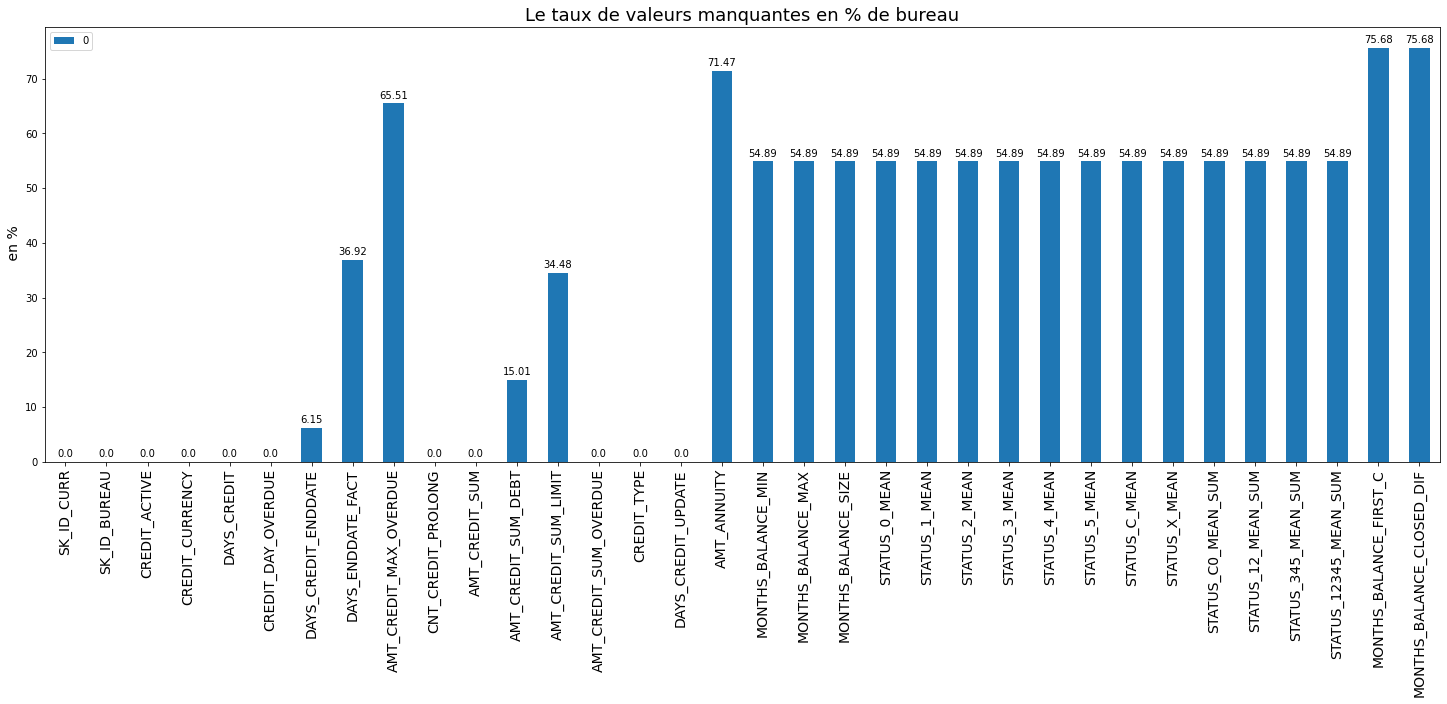

In [21]:
missing_rate = (bureau.isna().sum()/bureau.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de bureau",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

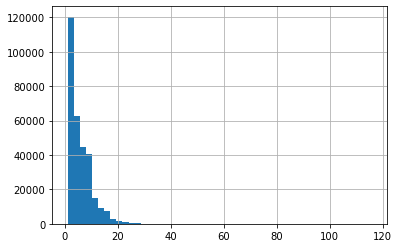

median      4.000000
std         4.430354
max       116.000000
mean        5.612709
min         1.000000
Name: SK_ID_BUREAU, dtype: float64

In [22]:
# How many loans of each customer are there to from Credit Bureau?
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().hist(bins=50), plt.show()
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().agg({"min", "max", "mean", "median", "std"})

Manipulation de données de bureau

In [23]:
# FEATURE ENGINEERING FOR BUREAU

# Categorical Variables
# -----------------------------------------------------------
# Useless
# bureau.drop("CREDIT_CURRENCY", axis = 1, inplace = True)

# Rare Categories
bureau["CREDIT_ACTIVE"] = np.where(bureau.CREDIT_ACTIVE.isin(["Sold", "Bad debt"]), "Sold_BadDebt", bureau.CREDIT_ACTIVE)

bureau["CREDIT_TYPE"] = np.where(
    ~bureau.CREDIT_TYPE.isin(
        ["Consumer credit", "Credit card", "Car loan", "Mortgage", "Microloan"]
    ), "Other", bureau["CREDIT_TYPE"])

# One-Hot Encoder
bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category=False)


# Numerical Variables
# -----------------------------------------------------------

# Bureau and bureau_balance numeric features
# cal = ['min', 'max', 'mean', 'sum', 'median','std']
cal = ['mean']
cols1 = [
    'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE','CREDIT_DAY_OVERDUE',
    'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE',
    'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY', 'CNT_CREDIT_PROLONG', 'MONTHS_BALANCE_MIN',
    'MONTHS_BALANCE_MAX', 'MONTHS_BALANCE_SIZE', 'MONTHS_BALANCE_FIRST_C', 'MONTHS_BALANCE_CLOSED_DIF'
]

num_aggregations = {}


for i in cols1:
    num_aggregations[i] = cal
    
    
# Bureau and bureau_balance categorical features
cat_aggregations = {}

for i in bureau_cat:
    cat_aggregations[i] = ['mean']

cols2 = ['STATUS_0_MEAN', 'STATUS_1_MEAN', 'STATUS_2_MEAN', 'STATUS_3_MEAN', 'STATUS_4_MEAN',
        'STATUS_5_MEAN', 'STATUS_C_MEAN', 'STATUS_X_MEAN', 'STATUS_C0_MEAN_SUM',
        'STATUS_12_MEAN_SUM', 'STATUS_345_MEAN_SUM', 'STATUS_12345_MEAN_SUM']
for i in cols2:
#     cat_aggregations[i] = ['mean', 'median', 'sum', 'max', 'std']
    cat_aggregations[i] = ['mean']

# del i, cols1, cols2, bureau_cat, cal
    
# Create aggregated data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BUREAU_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])


# New features
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().value_counts()
bcount = bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().reset_index().rename({"SK_ID_BUREAU":"BUREAU_COUNT"}, axis = 1)
bcount["BUREAU_COUNT_CAT"] = np.where(bcount.BUREAU_COUNT < 4, 0, 1)
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 8) & (bcount.BUREAU_COUNT < 13), 2, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 13) & (bcount.BUREAU_COUNT < 20), 3, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 20), 4, bcount["BUREAU_COUNT_CAT"])
bureau_agg = pd.merge(bureau_agg, bcount, how = "left", on = "SK_ID_CURR")
# del bcount


# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, active_agg, how='left', on='SK_ID_CURR')
# del active, active_agg


# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, closed_agg, how='left', on='SK_ID_CURR')
# del closed, closed_agg

# Bureau: Sold and Bad Debt credits - using only numerical aggregations
sold_baddebt = bureau[bureau['CREDIT_ACTIVE_Sold_BadDebt'] == 1]
sold_baddebt_agg = sold_baddebt.groupby('SK_ID_CURR').agg(num_aggregations)
sold_baddebt_agg.columns = pd.Index(['SOLD_BADDEBT' + e[0] + "_" + e[1].upper() for e in sold_baddebt_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, sold_baddebt_agg, how='left', on='SK_ID_CURR')
# del sold_baddebt, sold_baddebt_agg, bureau

# del num_aggregations, cat_aggregations


# WRITE FEATHER
# bureau_agg.to_feather("bureau_bureaubalance_agg_feather")
#pd.read_feather("./bureau_bureaubalance_agg_feather")

print("BUREAU & BURAU BALANCE SHAPE:", bureau_agg.shape, "\n")

bureau_agg.head()

BUREAU & BURAU BALANCE SHAPE: (305811, 92) 



SK_ID_CURR  BUREAU_DAYS_CREDIT_MEAN  BUREAU_DAYS_CREDIT_ENDDATE_MEAN  \
0      100001              -735.000000                        82.428571   
1      100002              -874.000000                      -349.000000   
2      100003             -1400.750000                      -544.500000   
3      100004              -867.000000                      -488.500000   
4      100005              -190.666667                       439.333333   

   BUREAU_DAYS_CREDIT_UPDATE_MEAN  BUREAU_CREDIT_DAY_OVERDUE_MEAN  \
0                      -93.142857                             0.0   
1                     -499.875000                             0.0   
2                     -816.000000                             0.0   
3                     -532.000000                             0.0   
4                      -54.333333                             0.0   

   BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN  BUREAU_AMT_CREDIT_SUM_MEAN  \
0                                 NaN               207623.571429   
1                            1681.029               108131.945625   
2                               0.000               254350.125000   
3                               0.000                94518.900000   
4                               0.000               219042.000000   

   BUREAU_AMT_CREDIT_SUM_DEBT_MEAN  BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN  \
0                     85240.928571                                 0.0   
1                     49156.200000                                 0.0   
2                         0.000000                                 0.0   
3                         0.000000                                 0.0   
4                    189469.500000                                 0.0   

   BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN  BUREAU_AMT_ANNUITY_MEAN  \
0                           0.00000              3545.357143   
1                        7997.14125                 0.000000   
2                      202500.00000                      NaN   
3                           0.00000                      NaN   
4                           0.00000              1420.500000   

   BUREAU_CNT_CREDIT_PROLONG_MEAN  BUREAU_MONTHS_BALANCE_MIN_MEAN  \
0                             0.0                      -23.571429   
1                             0.0                      -28.250000   
2                             0.0                             NaN   
3                             0.0                             NaN   
4                             0.0                       -6.000000   

   BUREAU_MONTHS_BALANCE_MAX_MEAN  BUREAU_MONTHS_BALANCE_SIZE_MEAN  \
0                             0.0                        24.571429   
1                           -15.5                        13.750000   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             0.0                         7.000000   

   BUREAU_MONTHS_BALANCE_FIRST_C_MEAN  BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEAN  \
0                                26.5                               7.500000   
1                                20.5                              13.166667   
2                                 NaN                                    NaN   
3                                 NaN                                    NaN   
4                                 4.0                               8.000000   

   BUREAU_CREDIT_ACTIVE_Active_MEAN  BUREAU_CREDIT_ACTIVE_Closed_MEAN  \
0                          0.428571                          0.571429   
1                          0.250000                          0.750000   
2                          0.250000                          0.750000   
3                          0.000000                          1.000000   
4                          0.666667                          0.333333   

   BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN  \
0                                     0.0   
1                                     0.0   
2

## POS CASH balance

Le taux de valeurs manquantes en %

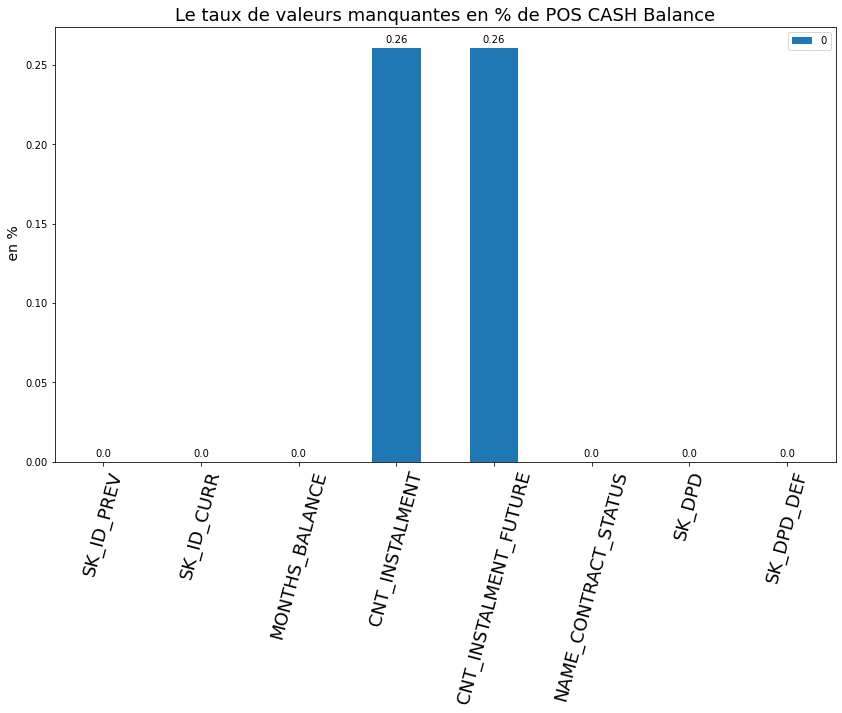

In [24]:
missing_rate = (df_POS_CASH_balance.isna().sum()/df_POS_CASH_balance.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(14,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='75', fontsize=18)
plt.title("Le taux de valeurs manquantes en % de POS CASH Balance",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [25]:
df_POS_CASH_balance

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0            1803195      182943             -31            48.0   
1            1715348      367990             -33            36.0   
2            1784872      397406             -32            12.0   
3            1903291      269225             -35            48.0   
4            2341044      334279             -35            36.0   
...              ...         ...             ...             ...   
10001353     2448283      226558             -20             6.0   
10001354     1717234      141565             -19            12.0   
10001355     1283126      315695             -21            10.0   
10001356     1082516      450255             -22            12.0   
10001357     1259607      174278             -52            16.0   

          CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                          45.0               Active       0           0  
1                          35.0               Active       0           0  
2                           9.0               Active       0           0  
3                          42.0               Active       0           0  
4                          35.0               Active       0           0  
...                         ...                  ...     ...         ...  
10001353                    0.0               Active     843           0  
10001354                    0.0               Active     602           0  
10001355                    0.0               Active     609           0  
10001356                    0.0               Active     614           0  
10001357                    0.0            Completed       0           0  

[10001358 rows x 8 columns]

Nettoyage de données de df_POS_CASH_balance

In [26]:
# Rare
df_POS_CASH_balance["NAME_CONTRACT_STATUS"] = np.where(~(df_POS_CASH_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", df_POS_CASH_balance["NAME_CONTRACT_STATUS"])

# One-Hot Encoder
df_POS_CASH_balance, cat_cols = one_hot_encoder(df_POS_CASH_balance, nan_as_category=False)

aggregations = {
    # Numerical
#     'MONTHS_BALANCE': ['max', 'mean', 'size'],
#     'CNT_INSTALMENT': ['max', 'mean', 'std', 'min', 'median'],
#     'CNT_INSTALMENT_FUTURE': ['max', 'mean', 'sum', 'min', 'median', 'std'],
#     'SK_DPD': ['max', 'mean'],
#     'SK_DPD_DEF': ['max', 'mean']
    'MONTHS_BALANCE': ['mean', 'size'],
    'CNT_INSTALMENT': ['mean'],
    'CNT_INSTALMENT_FUTURE': ['mean'],
    'SK_DPD': ['mean'],
    'SK_DPD_DEF': ['mean']
}
# Categorical
for cat in cat_cols:
    aggregations[cat] = ['mean']

# Aggregation
df_POS_CASH_balance_agg = df_POS_CASH_balance.groupby('SK_ID_CURR').agg(aggregations)
df_POS_CASH_balance_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in df_POS_CASH_balance_agg.columns.tolist()])
# Count df_POS_CASH_balance cash accounts
df_POS_CASH_balance_agg['df_POS_CASH_balance_COUNT'] = df_POS_CASH_balance.groupby('SK_ID_CURR').size()
df_POS_CASH_balance_agg.reset_index(inplace = True)
del df_POS_CASH_balance

print("df_POS_CASH_balance CASH BALANCE SHAPE:", df_POS_CASH_balance_agg.shape, "\n")

df_POS_CASH_balance_agg.head()

df_POS_CASH_balance CASH BALANCE SHAPE: (337252, 11) 



SK_ID_CURR  POS_MONTHS_BALANCE_MEAN  POS_MONTHS_BALANCE_SIZE  \
0      100001               -72.555556                        9   
1      100002               -10.000000                       19   
2      100003               -43.785714                       28   
3      100004               -25.500000                        4   
4      100005               -20.000000                       11   

   POS_CNT_INSTALMENT_MEAN  POS_CNT_INSTALMENT_FUTURE_MEAN  POS_SK_DPD_MEAN  \
0                 4.000000                        1.444444         0.777778   
1                24.000000                       15.000000         0.000000   
2                10.107143                        5.785714         0.000000   
3                 3.750000                        2.250000         0.000000   
4                11.700000                        7.200000         0.000000   

   POS_SK_DPD_DEF_MEAN  POS_NAME_CONTRACT_STATUS_Active_MEAN  \
0             0.777778                              0.777778   
1             0.000000                              1.000000   
2             0.000000                              0.928571   
3             0.000000                              0.750000   
4             0.000000                              0.818182   

   POS_NAME_CONTRACT_STATUS_Completed_MEAN  \
0                                 0.222222   
1                                 0.000000   
2                                 0.071429   
3                                 0.250000   
4                                 0.090909   

   POS_NAME_CONTRACT_STATUS_Rare_MEAN  df_POS_CASH_balance_COUNT  
0                            0.000000                          9  
1                            0.000000                         19  
2                            0.000000                         28  
3                            0.000000                          4  
4                            0.090909                         11

## Credit Card Balance

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) liés aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon # de cartes de crédit précédentes relatives # de mois où nous avons un historique observable pour les lignes de carte de crédit précédentes).

Le taux de valeurs manquantes en % df_credit_card_balance

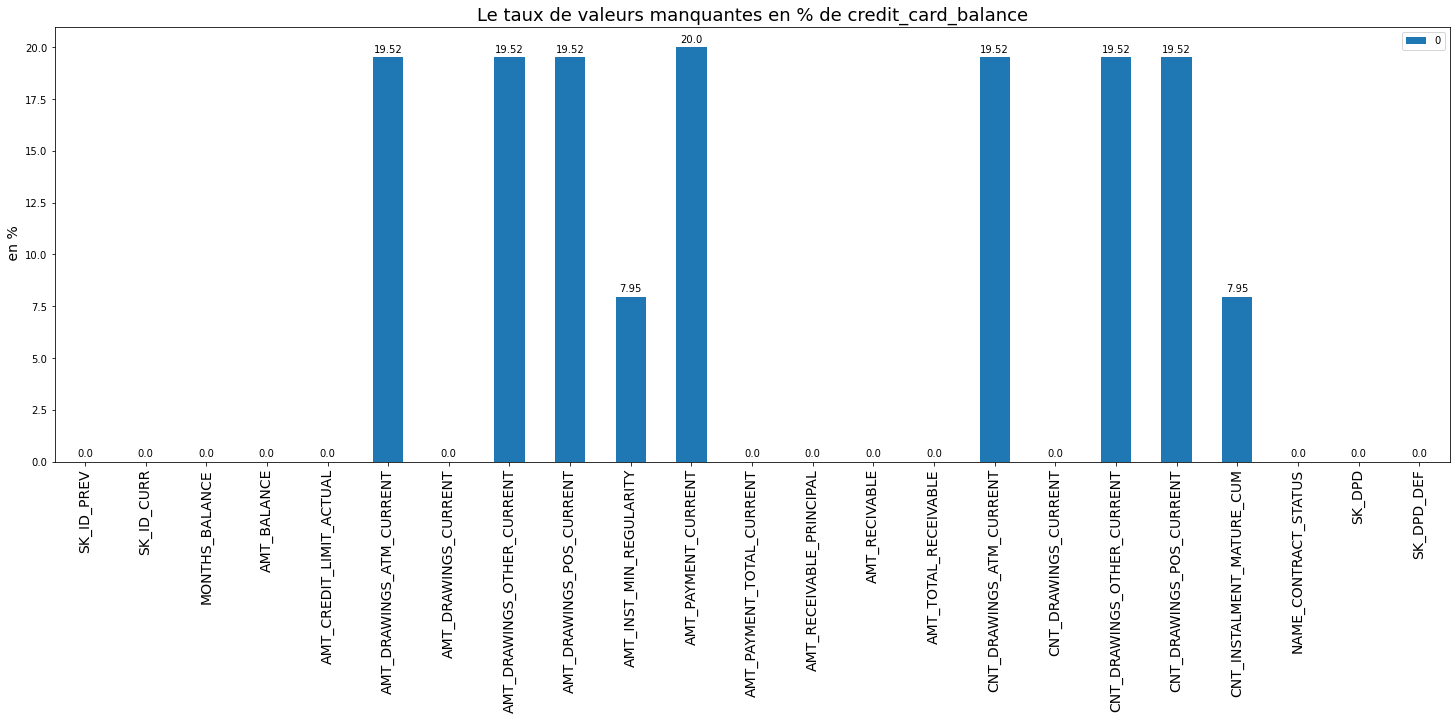

In [27]:
missing_rate = (df_credit_card_balance.isna().sum()/df_credit_card_balance.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de credit_card_balance",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données df_credit_card_balance

In [28]:
# Rare
df_credit_card_balance["NAME_CONTRACT_STATUS"] = np.where(~(df_credit_card_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", df_credit_card_balance["NAME_CONTRACT_STATUS"])

# One Hot Encoder
df_credit_card_balance, cat_cols = one_hot_encoder(df_credit_card_balance, nan_as_category=False)

# General aggregations
df_credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)
df_credit_card_balance_agg = df_credit_card_balance.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'std'])
df_credit_card_balance_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in df_credit_card_balance_agg.columns.tolist()])
# Count credit card lines
df_credit_card_balance_agg['df_credit_card_balance_COUNT'] = df_credit_card_balance.groupby('SK_ID_CURR').size()
df_credit_card_balance_agg.reset_index(inplace = True)
del df_credit_card_balance

print("CREDIT CARD BALANCE SHAPE:", df_credit_card_balance_agg.shape, "\n")

df_credit_card_balance_agg.head()

CREDIT CARD BALANCE SHAPE: (103558, 117) 



SK_ID_CURR  CC_MONTHS_BALANCE_MIN  CC_MONTHS_BALANCE_MAX  \
0      100006                     -6                     -1   
1      100011                    -75                     -2   
2      100013                    -96                     -1   
3      100021                    -18                     -2   
4      100023                    -11                     -4   

   CC_MONTHS_BALANCE_MEAN  CC_MONTHS_BALANCE_SUM  CC_MONTHS_BALANCE_STD  \
0                    -3.5                    -21               1.870829   
1                   -38.5                  -2849              21.505813   
2                   -48.5                  -4656              27.856777   
3                   -10.0                   -170               5.049752   
4                    -7.5                    -60               2.449490   

   CC_AMT_BALANCE_MIN  CC_AMT_BALANCE_MAX  CC_AMT_BALANCE_MEAN  \
0                 0.0                0.00             0.000000   
1                 0.0           189000.00         54482.111149   
2                 0.0           161420.22         18159.919219   
3                 0.0                0.00             0.000000   
4                 0.0                0.00             0.000000   

   CC_AMT_BALANCE_SUM  CC_AMT_BALANCE_STD  CC_AMT_CREDIT_LIMIT_ACTUAL_MIN  \
0               0.000            0.000000                          270000   
1         4031676.225        68127.238270                           90000   
2         1743352.245        43237.406997                           45000   
3               0.000            0.000000                          675000   
4               0.000            0.000000                           45000   

   CC_AMT_CREDIT_LIMIT_ACTUAL_MAX  CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN  \
0                          270000                    270000.000000   
1                          180000                    164189.189189   
2                          157500                    131718.750000   
3                          675000                    675000.000000   
4                          225000                    135000.000000   

   CC_AMT_CREDIT_LIMIT_ACTUAL_SUM  CC_AMT_CREDIT_LIMIT_ACTUAL_STD  \
0                         1620000                        0.000000   
1                        12150000                    34482.743620   
2                        12645000                    47531.585759   
3                        11475000                        0.000000   
4                         1080000                    96214.047088   

   CC_AMT_DRAWINGS_ATM_CURRENT_MIN  CC_AMT_DRAWINGS_ATM_CURRENT_MAX  \
0                              NaN                              NaN   
1                              0.0                         180000.0   
2                              0.0                         157500.0   
3                              NaN                              NaN   
4                              NaN                              NaN   

   CC_AMT_DRAWINGS_ATM_CURRENT_MEAN  CC_AMT_DRAWINGS_ATM_CURRENT_SUM  \
0                               NaN                              0.0   
1                       2432.432432                         180000.0   
2                       6350.000000                         571500.0   
3                               NaN                              0.0   
4                               NaN                              0.0   

   CC_AMT_DRAWINGS_ATM_CURRENT_STD  CC_AMT_DRAWINGS_CURRENT_MIN  \
0                              NaN                          0.0   
1                     20924.574974                          0.0   
2                     28722.270457                          0.0   
3                              NaN                          0.0   
4                              NaN                          0.0   

   CC_AMT_DRAWINGS_CURRENT_MAX  CC_AMT_DRAWINGS_CURRENT_MEAN  \
0                          0.0                      0.000000   
1                     180000.0                   2432.432432   
2                     

## Installments Payments

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon. Il y a :

-  une ligne pour chaque paiement effectué plus 
-  une ligne pour chaque paiement manqué. Une ligne équivaut à un versement d'une échéance ou une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

Le taux de valeurs manquantes en % df_credit_card_balance

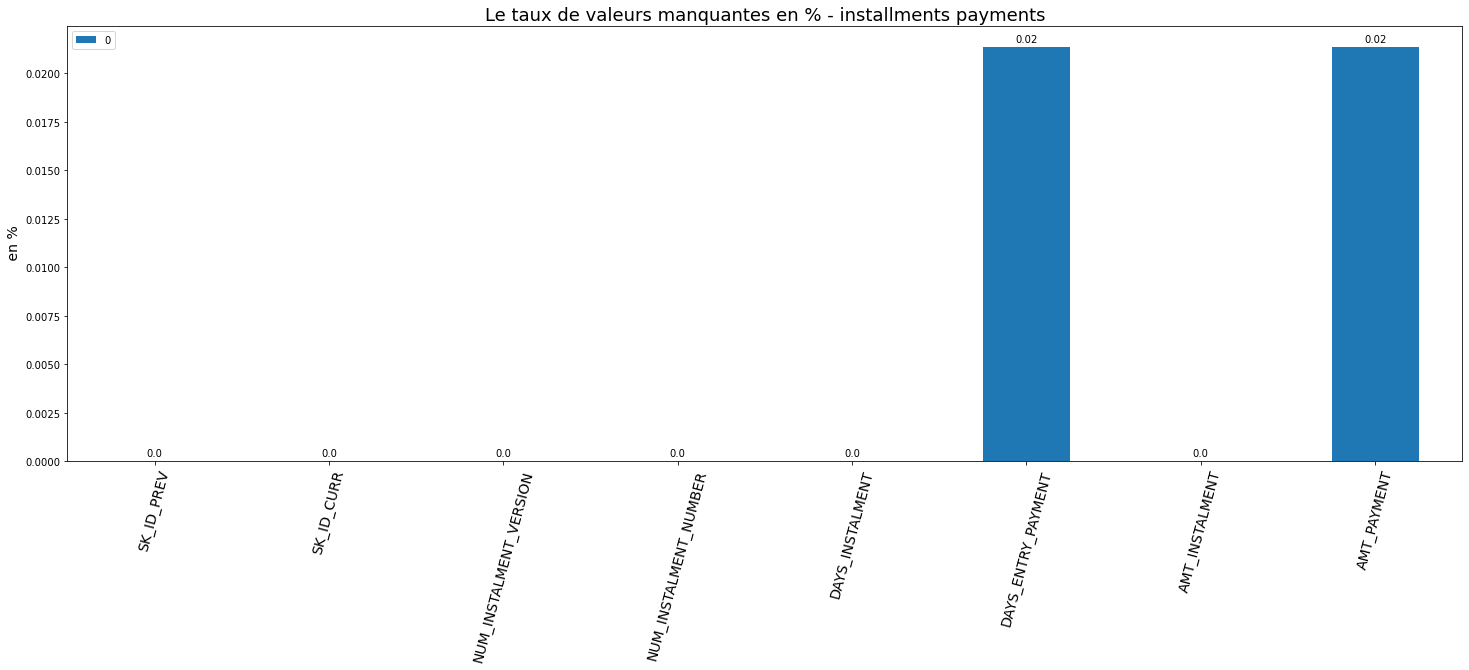

In [29]:
missing_rate = (df_installments_payments.isna().sum()/df_installments_payments.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='75', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [30]:
# Percentage and difference paid in each installment (amount paid and installment value)
df_installments_payments['PAYMENT_PERC'] = df_installments_payments['AMT_PAYMENT'] / df_installments_payments['AMT_INSTALMENT']
df_installments_payments['PAYMENT_DIFF'] = df_installments_payments['AMT_INSTALMENT'] - df_installments_payments['AMT_PAYMENT']
# Days past due and days before due (no negative values)
df_installments_payments['DPD'] = df_installments_payments['DAYS_ENTRY_PAYMENT'] - df_installments_payments['DAYS_INSTALMENT']
df_installments_payments['DBD'] = df_installments_payments['DAYS_INSTALMENT'] - df_installments_payments['DAYS_ENTRY_PAYMENT']
df_installments_payments['DPD'] = df_installments_payments['DPD'].apply(lambda x: x if x > 0 else 0)
df_installments_payments['DBD'] = df_installments_payments['DBD'].apply(lambda x: x if x > 0 else 0)
# Features: Perform aggregations
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'NUM_INSTALMENT_NUMBER': ['mean'],
    'DAYS_INSTALMENT': ['mean'],
    'DAYS_ENTRY_PAYMENT': ['mean'],
    'AMT_INSTALMENT': ['mean'],
    'AMT_PAYMENT': ['mean'],
    'DPD': ['mean'],
    'DBD': ['mean'],
    'PAYMENT_PERC': ['mean'],
    'PAYMENT_DIFF': ['mean']
}

df_installments_payments_agg = df_installments_payments.groupby('SK_ID_CURR').agg(aggregations)
df_installments_payments_agg.columns = pd.Index(['INS_' + e[0] + "_" + e[1].upper() for e in df_installments_payments_agg.columns.tolist()])
# Count installments accounts
df_installments_payments_agg['INS_COUNT'] = df_installments_payments.groupby('SK_ID_CURR').size()

df_installments_payments_agg.reset_index(inplace = True)
del df_installments_payments



print("INSTALLMENTS PAYMENTS SHAPE:", df_installments_payments_agg.shape, "\n")

df_installments_payments_agg.head()

INSTALLMENTS PAYMENTS SHAPE: (339587, 12) 



SK_ID_CURR  INS_NUM_INSTALMENT_VERSION_NUNIQUE  \
0      100001                                   2   
1      100002                                   2   
2      100003                                   2   
3      100004                                   2   
4      100005                                   2   

   INS_NUM_INSTALMENT_NUMBER_MEAN  INS_DAYS_INSTALMENT_MEAN  \
0                        2.714286              -2187.714286   
1                       10.000000               -295.000000   
2                        5.080000              -1378.160000   
3                        2.000000               -754.000000   
4                        5.000000               -586.000000   

   INS_DAYS_ENTRY_PAYMENT_MEAN  INS_AMT_INSTALMENT_MEAN  INS_AMT_PAYMENT_MEAN  \
0                 -2195.000000              5885.132143           5885.132143   
1                  -315.421053             11559.247105          11559.247105   
2                 -1385.320000             64754.586000          64754.586000   
3                  -761.666667              7096.155000           7096.155000   
4                  -609.555556              6240.205000           6240.205000   

   INS_DPD_MEAN  INS_DBD_MEAN  INS_PAYMENT_PERC_MEAN  INS_PAYMENT_DIFF_MEAN  \
0      1.571429      8.857143                    1.0                    0.0   
1      0.000000     20.421053                    1.0                    0.0   
2      0.000000      7.160000                    1.0                    0.0   
3      0.000000      7.666667                    1.0                    0.0   
4      0.111111     23.666667                    1.0                    0.0   

   INS_COUNT  
0          7  
1         19  
2         25  
3          3  
4          9

In [31]:
# df_installments_payments_agg.reset_index(drop=True)
# df_installments_payments_agg.to_csv('df_installments_payments_agg.csv', index = False)

## Previous Applications

- Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
- Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

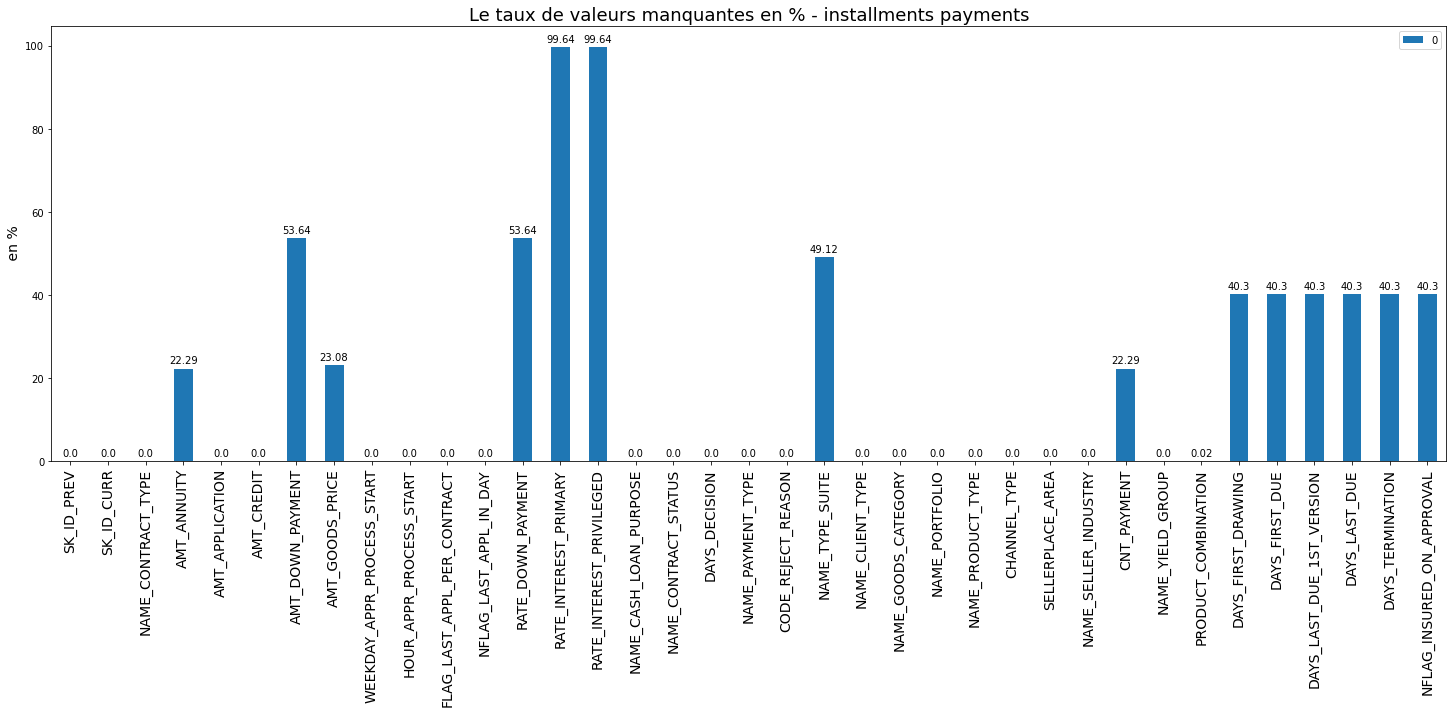

In [32]:
missing_rate = (df_previous_application.isna().sum()/df_previous_application.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données de df_previous_application

In [33]:
# Rare Encoder
rare_cols = [
    "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "CHANNEL_TYPE", "NAME_GOODS_CATEGORY",
    "NAME_SELLER_INDUSTRY", "NAME_TYPE_SUITE"
]

for i in rare_cols:
    rare_encoder(df_previous_application, i, rare_perc = 0.01)

df_previous_application["NAME_CASH_LOAN_PURPOSE"] = np.where(~df_previous_application["NAME_CASH_LOAN_PURPOSE"].isin(["XAP", "XNA"]), "Other", df_previous_application["NAME_CASH_LOAN_PURPOSE"])

rare_encoder(df_previous_application, "NAME_PORTFOLIO", rare_perc = 0.1) 

# Cash, Pos, Card
df_previous_application["PRODUCT_COMBINATION_CATS"] = np.where(df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash"), "CASH", "POS")
df_previous_application["PRODUCT_COMBINATION_CATS"] = np.where(df_previous_application["PRODUCT_COMBINATION"].str.contains("Card"), "CARD", df_previous_application["PRODUCT_COMBINATION_CATS"])
# New categorical variables
df_previous_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("without"))), "WITHOUT", "OTHER")
df_previous_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("with interest"))), "WITH", df_previous_application["PRODUCT_COMBINATION_POS_WITH"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("household"))), "household", "OTHER")
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("industry"))), "industry", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("mobile"))), "mobile", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("other"))), "posother", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("X-Sell"))), "xsell", "OTHER")
df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("Street"))), "street", df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"])


# Useless
df_previous_application.drop(["WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "NFLAG_LAST_APPL_IN_DAY"], axis = 1, inplace = True)

# One-Hot Encoder
df_previous_application, cat_cols = one_hot_encoder(df_previous_application, nan_as_category=True)


# Days 365.243 values -> nan
df_previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

# Add feature: value ask / value received percentage
df_previous_application['APP_CREDIT_PERC'] = df_previous_application['AMT_APPLICATION'] / df_previous_application['AMT_CREDIT']


# Previous Applications numeric features
num_aggregations = {
#     'AMT_ANNUITY': ['min', 'max', 'mean', "median", "std"],
#     'AMT_APPLICATION': ['min', 'max', 'mean', "median", "std"],
#     'AMT_CREDIT': ['min', 'max', 'mean', "median", "std"],
#     'APP_CREDIT_PERC': ['min', 'max', 'mean', "median", "std"],
#     'AMT_DOWN_PAYMENT': ['min', 'max', 'mean', "median", "std"],
#     'AMT_GOODS_PRICE': ['min', 'max', 'mean', "median", "std"],
#     'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean', "median", "std"],
#     'RATE_DOWN_PAYMENT': ['min', 'max', 'mean', "std"],
#     'RATE_INTEREST_PRIMARY': ['min', 'max', 'mean', "std"],
#     'RATE_INTEREST_PRIVILEGED': ['min', 'max', 'mean', "std"],
#     'DAYS_DECISION': ['min', 'max', 'mean', "median", "std"],
#     'CNT_PAYMENT': ['mean', 'sum', "median", "std"],
#     'SELLERPLACE_AREA': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_FIRST_DRAWING': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_FIRST_DUE': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_LAST_DUE': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_TERMINATION': ['min', 'max', 'mean', "median", "std"],
    
    'AMT_ANNUITY': ['mean'],
    'AMT_APPLICATION': ['mean'],
    'AMT_CREDIT': ['mean'],
    'APP_CREDIT_PERC': ['mean'],
    'AMT_DOWN_PAYMENT': ['mean'],
    'AMT_GOODS_PRICE': ['mean'],
    'HOUR_APPR_PROCESS_START': ['mean'],
    'RATE_DOWN_PAYMENT': ['mean'],
    'RATE_INTEREST_PRIMARY': ['mean'],
    'RATE_INTEREST_PRIVILEGED': ['mean'],
    'DAYS_DECISION': ['mean'],
    'CNT_PAYMENT': ['mean'],
    'SELLERPLACE_AREA': ['mean'],
    'DAYS_FIRST_DRAWING': ['mean'],
    'DAYS_FIRST_DUE': ['mean'],
    'DAYS_LAST_DUE_1ST_VERSION': ['mean'],
    'DAYS_LAST_DUE': ['mean'],
    'DAYS_TERMINATION': ['mean'],
    # Categorical
    "NFLAG_INSURED_ON_APPROVAL": ["mean"]
}
# Previous Applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean']

df_previous_application_agg = df_previous_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
df_previous_application_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in df_previous_application_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = df_previous_application[df_previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
df_previous_application_agg = pd.merge(df_previous_application_agg,approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = df_previous_application[df_previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
df_previous_application_agg = pd.merge(df_previous_application_agg, refused_agg, how='left', on='SK_ID_CURR')

del refused, refused_agg, approved, approved_agg
df_previous_application_agg.reset_index(inplace = True)


print("PREVIOUS APPLICATIONS SHAPE:", df_previous_application_agg.shape, "\n")

df_previous_application_agg.head()

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


PREVIOUS APPLICATIONS SHAPE: (338857, 174) 



SK_ID_CURR  PREV_AMT_ANNUITY_MEAN  PREV_AMT_APPLICATION_MEAN  \
0      100001               3951.000                   24835.50   
1      100002               9251.775                  179055.00   
2      100003              56553.990                  435436.50   
3      100004               5357.250                   24282.00   
4      100005               4813.200                   22308.75   

   PREV_AMT_CREDIT_MEAN  PREV_APP_CREDIT_PERC_MEAN  \
0              23787.00                   1.044079   
1             179055.00                   1.000000   
2             484191.00                   0.949329   
3              20106.00                   1.207699   
4              20076.75                   1.111173   

   PREV_AMT_DOWN_PAYMENT_MEAN  PREV_AMT_GOODS_PRICE_MEAN  \
0                      2520.0                    24835.5   
1                         0.0                   179055.0   
2                      3442.5                   435436.5   
3                      4860.0                    24282.0   
4                      4464.0                    44617.5   

   PREV_HOUR_APPR_PROCESS_START_MEAN  PREV_RATE_DOWN_PAYMENT_MEAN  \
0                          13.000000                     0.104326   
1                           9.000000                     0.000000   
2                          14.666667                     0.050030   
3                           5.000000                     0.212008   
4                          10.500000                     0.108964   

   PREV_RATE_INTEREST_PRIMARY_MEAN  PREV_RATE_INTEREST_PRIVILEGED_MEAN  \
0                              NaN                                 NaN   
1                              NaN                                 NaN   
2                              NaN                                 NaN   
3                              NaN                                 NaN   
4                              NaN                                 NaN   

   PREV_DAYS_DECISION_MEAN  PREV_CNT_PAYMENT_MEAN  PREV_SELLERPLACE_AREA_MEAN  \
0                  -1740.0                    8.0                        23.0   
1                   -606.0                   24.0                       500.0   
2                  -1305.0                   10.0                       533.0   
3                   -815.0                    4.0                        30.0   
4                   -536.0                   12.0                        18.0   

   PREV_DAYS_FIRST_DRAWING_MEAN  PREV_DAYS_FIRST_DUE_MEAN  \
0                           NaN              -1709.000000   
1                           NaN               -565.000000   
2                           NaN              -1274.333333   
3                           NaN               -784.000000   
4                           NaN               -706.000000   

   PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN  PREV_DAYS_LAST_DUE_MEAN  \
0                         -1499.000000             -1619.000000   
1                           125.000000               -25.000000   
2                         -1004.333333             -1054.333333   
3                          -694.000000              -724.000000   
4                          -376.000000              -466.000000   

   PREV_DAYS_TERMINATION_MEAN  PREV_NFLAG_INSURED_ON_APPROVAL_MEAN  \
0                -1612.000000                             0.000000   
1                  -17.000000                             0.000000   
2                -1047.333333                             0.666667   
3                 -714.000000                             0.000000   
4                 -460.000000                             0.000000   

   PREV_NAME_CONTRACT_TYPE_Cash loans_MEAN  \
0                                 0.000000   
1                                 0.000000   
2                                 0.333333   
3                                 0.000000   
4                                 0.500000   

   PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN  \
0                                     1.000000   

In [34]:
# df_previous_application_agg.reset_index(drop=True)
# df_previous_application_agg.to_csv('df_previous_application_agg.csv', index = False)

## Application Train/Test

- Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
- Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

In [35]:
missing_rate = (df_app_train.isna().sum()/df_app_train.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
missing_rate

0
SK_ID_CURR                   0.000000
TARGET                       0.000000
NAME_CONTRACT_TYPE           0.000000
CODE_GENDER                  0.000000
FLAG_OWN_CAR                 0.000000
...                               ...
AMT_REQ_CREDIT_BUREAU_DAY   13.501631
AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
AMT_REQ_CREDIT_BUREAU_MON   13.501631
AMT_REQ_CREDIT_BUREAU_QRT   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR  13.501631

[122 rows x 1 columns]

In [36]:
df_app_train[df_app_train.CODE_GENDER.str.contains("XNA")]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
35657            -10024.0            -3537         13.0           1   
38566             -2241.0            -4659          NaN           1   
83382              -183.0            -1671          NaN           1   
189640            -4099.0            -2326          8.0           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35657                1                1                 1           1   
38566                1                1                 1           1   
83382                1                1                 1           1   
189640               1                1                 1           1   

        FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657            0                 NaN              2.0                     3   
38566            0  Low-skill Laborers              4.0                     2   
83382            0          Core staff              3.0                     2   
189640           0                 NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CI

In [37]:
df_app_train.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [38]:
df_app_train[df_app_train.NAME_FAMILY_STATUS.str.contains("Unknown")]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
41982             -3265.0            -4489          NaN           1   
187348            -1597.0            -1571          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
41982                1                1                 1           1   
187348               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982            0        Managers              NaN                     2   
187348           0     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  \
41982                         1               Insurance      0.628564   
187348                        0  Business Entity Type 2           NaN   

        EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
41982       0.700618           NaN             NaN               NaN   
187348      0.645168      0.670652          0.1031            0.0467   

        YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
41982                           NaN              NaN             NaN   
187348                        0.997           0.9592          0.0081   

        ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
41982             NaN            NaN            NaN            NaN   
187348           0.08          0.069          0.375         0.4167   

        LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
41982            NaN                   NaN             NaN   
187348           NaN                0.0841           0.088   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
41982                       NaN                NaN              NaN   
187348                      0.0                0.0            0.105   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
41982                 NaN                           NaN               NaN   
187348             0.0485                         0.997            0.9608   

  

Suppression des colonnes non pértinentes

In [39]:
# ERRORS
df_app_train = df_app_train[~(df_app_train.CODE_GENDER.str.contains("XNA"))]  
df_app_train = df_app_train[df_app_train.NAME_FAMILY_STATUS != "Unknown"]  

# DROP
cols = ["NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "FONDKAPREMONT_MODE", "WALLSMATERIAL_MODE", "HOUSETYPE_MODE",
        "EMERGENCYSTATE_MODE","FLAG_MOBIL", "FLAG_EMP_PHONE","FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]
df_app_train.drop(cols, axis = 1, inplace = True)

# REGION
cols = ["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
 "REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]
df_app_train["REGION"] = df_app_train[cols].sum(axis = 1)
df_app_train.drop(cols, axis = 1, inplace = True)

# Drop FLAG_DOCUMENT 
df_app_train.drop(df_app_train.columns[df_app_train.columns.str.contains("FLAG_DOCUMENT")], axis = 1, inplace = True)

In [40]:
# RARE ENCODER
df_app_train["NAME_EDUCATION_TYPE"] = np.where(df_app_train.NAME_EDUCATION_TYPE == "Academic degree", "Higher education", df_app_train.NAME_EDUCATION_TYPE)


df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Business Entity"), "Business Entity", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Industry"), "Industry", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Trade"), "Trade", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Transport"), "Transport", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["School", "Kindergarten", "University"]), "Education", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Emergency","Police", "Medicine","Goverment", "Postal", "Military", "Security Ministries", "Legal Services"]), "Public", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Bank", "Insurance"]), "Finance", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Realtor", "Housing"]), "House", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Hotel", "Restaurant"]), "HotelRestaurant", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Cleaning","Electricity", "Telecom", "Mobile", "Advertising", "Religion", "Culture"]), "Other", df_app_train.ORGANIZATION_TYPE)

df_app_train["OCCUPATION_TYPE"] = np.where(df_app_train.OCCUPATION_TYPE.isin(["Low-skill Laborers", "Cooking staff", "Security staff", "Private service staff", "Cleaning staff", "Waiters/barmen staff"]), "Low-skill Laborers", df_app_train.OCCUPATION_TYPE)
df_app_train["OCCUPATION_TYPE"] = np.where(df_app_train.OCCUPATION_TYPE.isin(["IT staff", "High skill tech staff"]), "High skill tech staff", df_app_train.OCCUPATION_TYPE)


rare_cols = ["NAME_TYPE_SUITE", "NAME_INCOME_TYPE"]

for i in rare_cols:
    rare_encoder(df_app_train, i, rare_perc = 0.01)

    
# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ["NAME_CONTRACT_TYPE", 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df_app_train[bin_feature], uniques = pd.factorize(df_app_train[bin_feature])
    
    
# Categorical features with One-Hot encode
df_app_train, cat_cols = one_hot_encoder(df_app_train, nan_as_category=False)


# NaN values for DAYS_EMPLOYED: 365.243 -> nan
df_app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# Some simple new features (percentages)
# df_app_train['DAYS_EMPLOYED_PERC'] = df_app_train['DAYS_EMPLOYED'] / df_app_train['DAYS_BIRTH']
# df_app_train['INCOME_CREDIT_PERC'] = df_app_train['AMT_INCOME_TOTAL'] / df_app_train['AMT_CREDIT']
# df_app_train['INCOME_PER_PERSON'] = df_app_train['AMT_INCOME_TOTAL'] / df_app_train['CNT_FAM_MEMBERS']
# df_app_train['ANNUITY_INCOME_PERC'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_INCOME_TOTAL']
# df_app_train['PAYMENT_RATE'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_CREDIT']


# EXT SOURCE MEAN FROM OTHER ASSOCIATIONS 
df_app_train["EXT_SOURCE_MEAN"] = df_app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
# df_app_train['NEW_APP_EXT_SOURCES_PROD'] = df_app_train['EXT_SOURCE_1'] * df_app_train['EXT_SOURCE_2'] * df_app_train['EXT_SOURCE_3']


# Satın alınacak ürünün toplam kredi tutarına oranı
# df_app_train["NEW_GOODS_CREDIT"] = df_app_train["AMT_GOODS_PRICE"] / df_app_train["AMT_CREDIT"]

# Kredinin yıllık ödemesinin müşterinin toplam gelirine oranı
# df_app_train['NEW_ANNUITY_INCOME_PERC'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_INCOME_TOTAL']

# Ürün ile kredi ile  arasındaki farkın toplam yıllık gelire oranı
# df_app_train["NEW_C_GP"] = (df_app_train["AMT_GOODS_PRICE"] - df_app_train["AMT_CREDIT"]) / df_app_train["AMT_INCOME_TOTAL"]


# Başvuru sırasında müşterinin gün cinsinden yaşı eksili olarak verilmiş
# -1 ile çarpıp 365'e böldüğümüzde kaç yaşında olduğunu buluyoruz

# df_app_train["NEW_APP_AGE"] = round(df_app_train["DAYS_BIRTH"] * -1 / 365)

# df_app_train['NEW_INCOME_PER_PERSON'] = df_app_train['AMT_INCOME_TOTAL'] / df_app_train['CNT_FAM_MEMBERS']
# df_app_train['NEW_PAYMENT_RATE'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_CREDIT']

# kredinin çekildiği ürünün fiyatı / kredi miktarı
# df_app_train["NEW_APP_GOODS/AMT_CREDIT"] = df_app_train["AMT_GOODS_PRICE"] / df_app_train["AMT_CREDIT"]

# df_app_train['NEW_LOAN_VALUE_RATIO'] = df_app_train['AMT_CREDIT'] / df_app_train['AMT_GOODS_PRICE']

# df_app_train['NEW_DAYS_EMPLOYED_PERC'] = df_app_train['DAYS_EMPLOYED'] / df_app_train['DAYS_BIRTH']
# df_app_train['NEW_ANNUITY_INCOME_PERC'] = df_app_train['AMT_ANNUITY'] / df_app_train['AMT_INCOME_TOTAL']

# df_app_train['NEW_INCOME_PER_PERSON_PERC_PAYMENT_RATE_INCOME_PER_PERSON'] = df_app_train['NEW_INCOME_PER_PERSON'] / df_app_train['NEW_PAYMENT_RATE']

#Drop Columns 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3
df_app_train.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'], axis=1, inplace=True)

print("APPLICATION TRAIN/TEST SHAPE:", df_app_train.shape, "\n")
df_app_train.head()

APPLICATION TRAIN/TEST SHAPE: (307505, 125) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

Vérifier les lignes dupliquées de df_app_train

In [41]:
len(df_app_train[df_app_train['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True))

0

## Fusionner les dataframes nettoyées

Fusionner df_app_train et bureau_agg

In [42]:
df_train = pd.merge(df_app_train, bureau_agg, how='left', on='SK_ID_CURR')

del bureau_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 216) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

In [43]:
# Supprimer les colonnes en doublon
# df_train.drop_duplicates(subset =df_train.columns, keep = False, inplace = True) 

Fusionner df_train et df_POS_CASH_balance_agg

In [44]:
df_train = pd.merge(df_train, df_POS_CASH_balance_agg, how='left', on='SK_ID_CURR')

del df_POS_CASH_balance_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 226) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

In [45]:
# df_train.reset_index(drop=True)
# df_train.to_csv('df_train.csv', index = False)

In [46]:
# from google.colab import drive
# drive.mount('/content/drive')

In [47]:
# df_train = pd.read_csv("df_train.csv")
# df_installments_payments_agg = pd.read_csv("df_installments_payments_agg.csv")
# df_previous_application_agg = pd.read_csv("df_previous_application_agg.csv")

Fusionner df_train et df_installments_payments_agg

In [48]:
df_train = pd.merge(df_train, df_installments_payments_agg, how='left', on='SK_ID_CURR')

del df_installments_payments_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 237) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

Fusionner df_train et df_previous_application_agg

In [49]:
df_train = pd.merge(df_train, df_previous_application_agg, how='left', on='SK_ID_CURR')

del df_previous_application_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 410) 



SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120          NaN              1.0   
1            -1186.0             -291          NaN              2.0   
2            -4260.0            -2531         26.0              1.0   
3            -9833.0            -2437          NaN              2.0   
4            -4311.0            -3458          NaN              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0         0.0833         0.1250        0.0369                0.0202   
1         0.2917         0.3333        0.0130                0.0773   
2            NaN            NaN           NaN                   NaN   
3            NaN            NaN           NaN                   NaN   
4            NaN            NaN           NaN                   NaN   

   LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0          0.0190                   0.0000             0.0000   
1          0.0549                   0.0039             0.0098   
2             NaN                      NaN                NaN   
3             NaN                      NaN                NaN   
4             NaN                      NaN                NaN   

   APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0          

In [50]:
df_train.shape

(307505, 410)

Supprimer les colonnes avec 30% de valeurs manquantes

In [51]:
index_names = (((df_train.isna().sum()/df_train.shape[0])*100))
df_train.drop(index_names[index_names>30].index, inplace=True, axis=1)

In [52]:
df_train.shape

(307505, 288)

In [53]:
df_train.memory_usage().sum() / 1024**2

579.4810104370117

In [ ]:
# df_train = reduce_mem_usage(df_train)

In [ ]:
# df_train.reset_index(drop=True)
# df_train.to_csv('df_train.csv', index = False)

In [ ]:
# df_train = pd.read_csv("df_train.csv")

# **<font color='blue'/>Analyse exploratoire des données**

---


**TARGET** :

- **1** : client en difficulté de paiement : il a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du crédit de notre échantillon

- **0** : tous les autres cas.

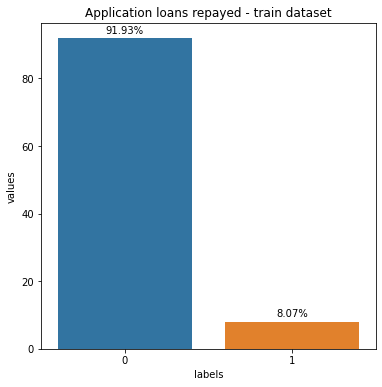

In [54]:
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height() + '%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

Sexe du client

Graphique séparé, le pourcentage des prêts (par sexe du client) avec la valeur CIBLE 1 (prêt non remboursé).

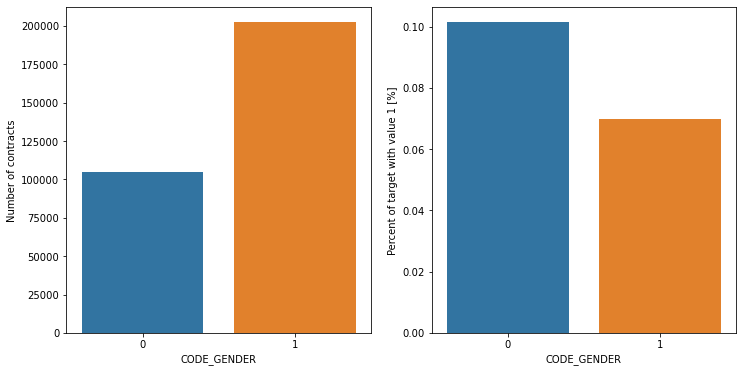

In [55]:
plot_stats('CODE_GENDER')

Client avec ou sans voiture ou bien immobilier

- Graphique qui indiquent si un client possède une voiture ou un bien immobilier 
- Graphique qui indiquent si un client possède une voiture ou un bien immobilier pour la cible 1

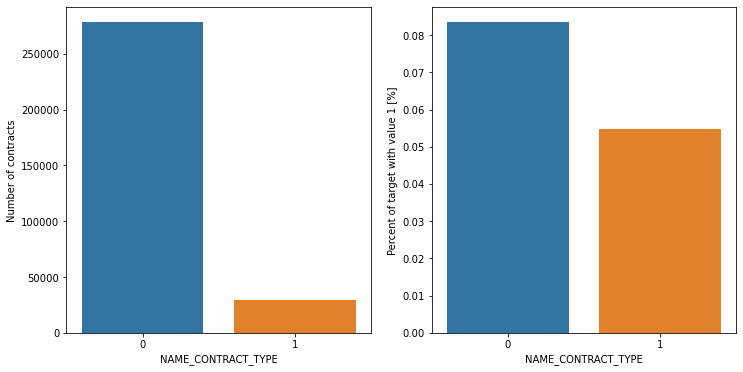

In [56]:
plot_stats('NAME_CONTRACT_TYPE')

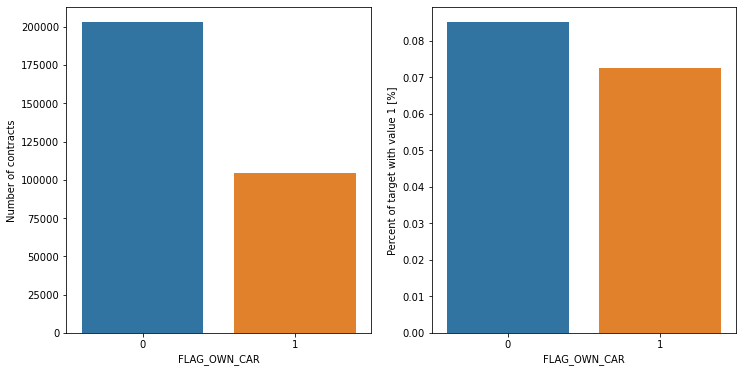

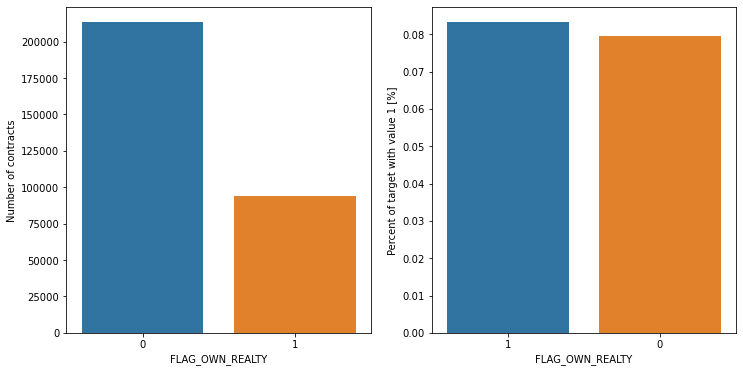

In [57]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

In [65]:
# plot_stats('NAME_FAMILY_STATUS',True, True)

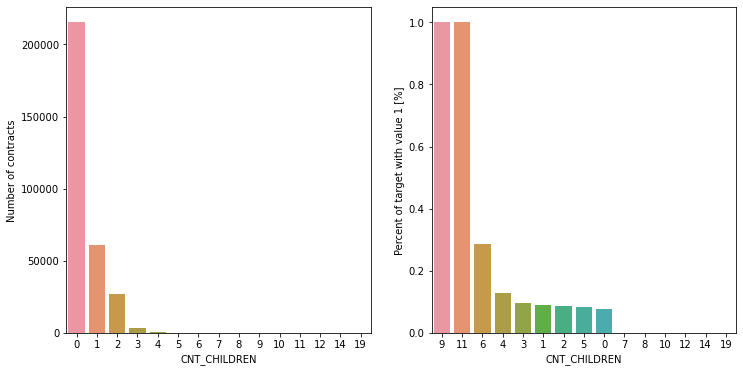

In [59]:
plot_stats('CNT_CHILDREN')

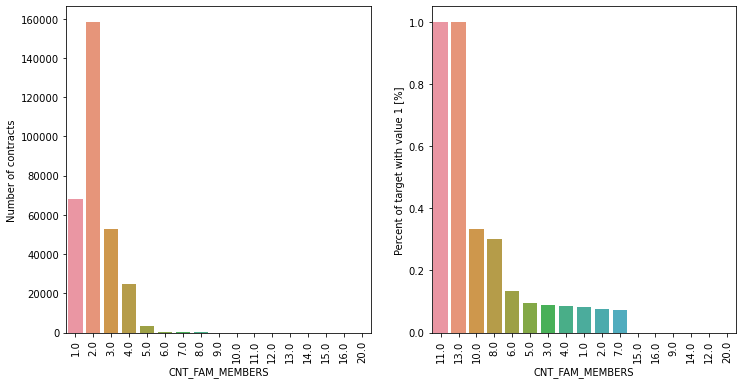

In [60]:
plot_stats('CNT_FAM_MEMBERS',True)

In [61]:
# plot_stats('NAME_INCOME_TYPE',False,False)

In [62]:
# plot_stats('OCCUPATION_TYPE',True, False)
# plot_stats('ORGANIZATION_TYPE',True, False)

In [66]:
# plot_stats('NAME_EDUCATION_TYPE',True)

KeyError: 'NAME_EDUCATION_TYPE'

<Figure size 432x288 with 0 Axes>

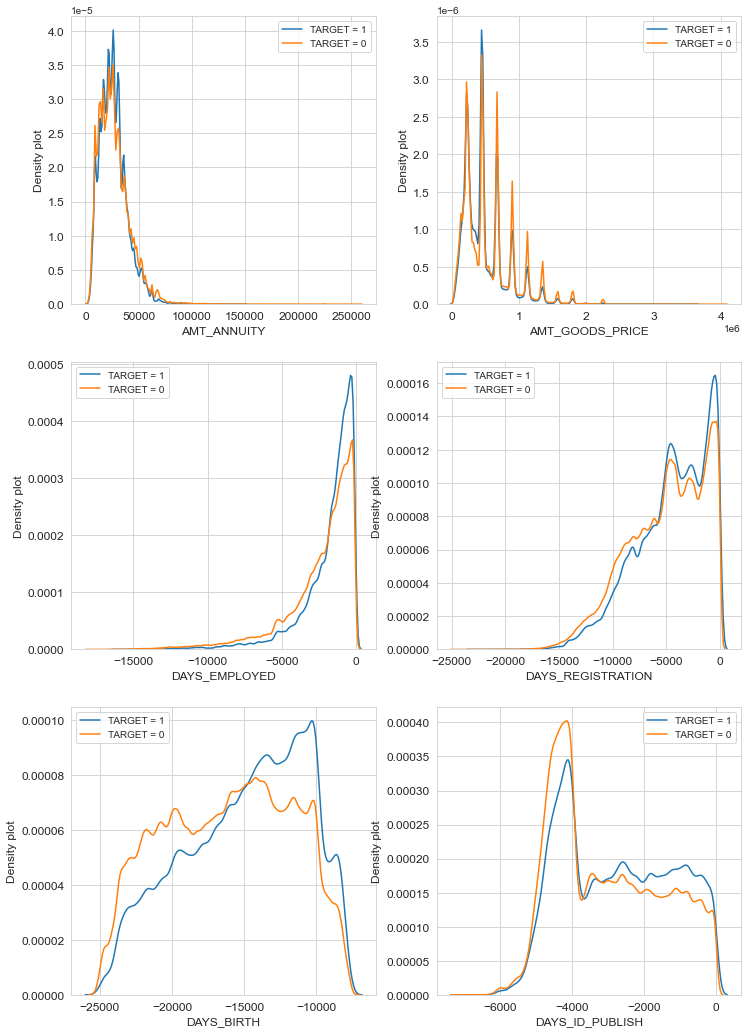

In [67]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

# **<font color='blue'/>Transformation et encodage des données**

---

Encoder les colonnes catégorielles

In [ ]:
# One-Hot Encoder
# df_train, df_train_cat = one_hot_encoder(df_train, nan_as_category=False)

Supprimer les caractères spéciaux des noms des colonnes

In [67]:
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', ' ', x))

In [68]:
df_train.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -3648.0            -2120              1.0                     2   
1            -1186.0             -291              2.0                     1   
2            -4260.0            -2531              1.0                     2   
3            -9833.0            -2437              2.0                     2   
4            -4311.0            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  REGION  \
0                        0.0                         1.0       0   
1                        0.0                         0.0       0   
2                        0.0            

In [69]:
df_train.shape

(307505, 288)

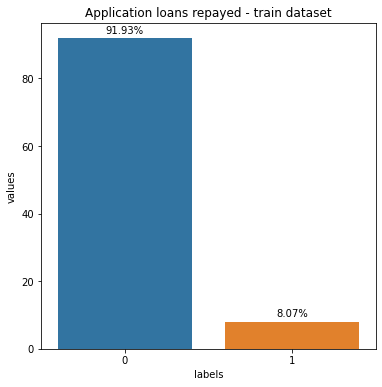

In [70]:
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height() + '%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

Utiliser la classe SimpleImputer pour ajuster et transformer les données comme suit :

In [71]:
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

# imputer = imp_mean.fit([df_train])

# data_train = imputer.transform([df_train])

# print(data_train)

In [72]:
print(np.any(np.isnan(df_train)))

True


In [73]:
missing_values(df_train, plot=False)

Number of Variables include Missing Values: 222 

                                Feature  Num_Missing  Missing_Ratio DataTypes
0            ACTIVE_AMT_CREDIT_SUM_MEAN        90361       0.293852   float64
1    ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN        90360       0.293849   float64
2        ACTIVE_CREDIT_DAY_OVERDUE_MEAN        90360       0.293849   float64
3        ACTIVE_CNT_CREDIT_PROLONG_MEAN        90360       0.293849   float64
4               ACTIVE_DAYS_CREDIT_MEAN        90360       0.293849   float64
..                                  ...          ...            ...       ...
217            OBS_60_CNT_SOCIAL_CIRCLE         1021       0.003320   float64
218                     AMT_GOODS_PRICE          276       0.000898   float64
219                     EXT_SOURCE_MEAN          172       0.000559   float64
220                         AMT_ANNUITY           12       0.000039   float64
221              DAYS_LAST_PHONE_CHANGE            1       0.000003   float64

[222 rows x 4

compter les valeurs infinies

In [74]:
count = np.isinf(df_train).values.sum()
count

0

Copier df_train

In [75]:
df_train1 = df_train.copy()

In [76]:
df_train1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'APPROVED_HOUR_APPR_PROCESS_START_MEAN',
       'APPROVED_RATE_DOWN_PAYMENT_MEAN', 'APPROVED_DAYS_DECISION_MEAN',
       'APPROVED_CNT_PAYMENT_MEAN', 'APPROVED_SELLERPLACE_AREA_MEAN',
       'APPROVED_DAYS_FIRST_DUE_MEAN',
       'APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEAN',
       'APPROVED_DAYS_LAST_DUE_MEAN', 'APPROVED_DAYS_TERMINATION_MEAN',
       'APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN'],
      dtype='object', length=288)

afficher l'index des lignes avce des valeurs inf

In [77]:
# printing row index with infinity
print()
print("printing row index with infinity ")
  
r = df_train1.index[np.isinf(df_train1).any(1)]
print(len(r))


printing row index with infinity 
0


Remplacer les valeurs infinies par 0

In [67]:
# # printing column name where infinity is present
# print("printing column name where infinity is present")
# col_name = df_train1.columns.to_series()[np.isinf(df_train1).any()]
# print(col_name)
# # df_train1.drop(columns=np.array(col_name), inplace=True)
# # Remplacer les valeurs infinies avec 0
# df_train1.replace([np.inf, -np.inf], 0, inplace=True)

# df_train1.shape

printing column name where infinity is present
INS_PAYMENT_PERC_MAX            INS_PAYMENT_PERC_MAX
INS_PAYMENT_PERC_MEDIAN      INS_PAYMENT_PERC_MEDIAN
PREV_APP_CREDIT_PERC_MAX    PREV_APP_CREDIT_PERC_MAX
dtype: object


(307505, 570)

In [78]:
# printing row index with infinity
print()
print("printing row index with infinity ")
  
r = df_train1.index[np.isinf(df_train1).any(1)]
print(r)


printing row index with infinity 
Int64Index([], dtype='int64')


In [83]:
df_train1.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   ...  APPROVED_HOUR_APPR_PROCESS_START_MEAN  \
0  ...                               9.000000   
1  ...                              14.664062   
2  ...                               5.000000   
3  ...                              14.398438   
4  ...                              12.335938   

   APPROVED_RATE_DOWN_PAYMENT_MEAN  APPROVED_DAYS_DECISION_MEAN  \
0                         0.000000                       -606.0   
1                         0.050018                      -1305.0   
2                         0.212036                       -815.0   
3                         0.163452                       -345.5   
4                         0.159546                      -1223.0   

   APPROVED_CNT_PAYMENT_MEAN  APPROVED_SELLERPLACE_AREA_MEAN  \
0                  24.000000                      500.000000   
1                  10.000000                      533.000000   
2                   4.000000                       30.000000   
3                  18.000000                     1610.400024   
4                  20.671875                      409.166656   

   APPROVED_DAYS_FIRST_DUE_MEAN  APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEAN  \
0                       -565.00                                   125.00   
1                      -1274.00                                 -1004.50   
2                       -784.00                                  -694.00   
3                       -325.75                                   364.25   
4                      -1263.00                                  -837.00   

   APPROVED_DAYS_LAST_DUE_MEAN  APPROVED_DAYS_TERMINATION_MEAN  \
0                        -25.0                           -17.0   
1                      -1054.0                         -1047.0   
2                       -724.0                          -714.0   
3                       -288.0                          -279.5   
4                      -1140.0                         -1131.0   

   APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN  
0                                 0.000000  
1                                 0.666504  
2                                 0.000000  
3                                 0.000000  
4                                 0.600098  

[5 rows x 287 columns]

In [71]:
# define imputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# imputer = KNNImputer(n_neighbors=5)

In [72]:
# df_imputed = pd.DataFrame(imputer.fit_transform(df_train1), columns = df_train1.columns)

# imputed = imputer.fit_transform(df_train)
# df_imputed = pd.DataFrame(imputed, columns=df_train.columns)

In [73]:
# df_imputed.shape

In [74]:
# df_imputed.to_csv('df_imputed.csv', index = False)

In [75]:
# df_imputed1 = df_imputed.copy() 

In [84]:
# pd.set_option('display.max_columns', 500)

Nombre de valeurs manquantes

In [79]:
print('Missing value: %d' % sum(df_train1.isna().sum()))

Missing value: 5553272


Traiter les valeurs manquantes

In [80]:
# Initialiser SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Affecter les colonnes avec les valeurs manquantes
col_nan = df_train1.columns[df_train1.isnull().any()].values

# X = imputer.fit_transform(df_train1)
df_train1[col_nan] = imputer.fit_transform(df_train1[col_nan])
df_train1.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            0             0   
1      100003       0                   0            1             0   
2      100004       0                   1            0             1   
3      100006       0                   0            1             0   
4      100007       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0          202500.0    406597.5      24700.5   
1                1             0          270000.0   1293502.5      35698.5   
2                0             0           67500.0    135000.0       6750.0   
3                0             0          135000.0    312682.5      29686.5   
4                0             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461         -637.0   
1        1129500.0                    0.003541      -16765        -1188.0   
2         135000.0                    0.010032      -19046         -225.0   
3         297000.0                    0.008019      -19005        -3039.0   
4         513000.0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0            -3648.0            -2120              1.0                     2   
1            -1186.0             -291              2.0                     1   
2            -4260.0            -2531              1.0                     2   
3            -9833.0            -2437              2.0                     2   
4            -4311.0            -3458              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                            2                       10   
1                            1                       11   
2                            2                        9   
3                            2                       17   
4                            2                       11   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                    0.000000                      0.000   
1                    0.000000                      0.000   
2                    0.000000                      0.000   
3                    0.006403                      0.007   
4                    0.000000                      0.000   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                    0.000000                   0.000000   
1                    0.000000                   0.000000   
2                    0.000000                   0.000000   
3                    0.034363                   0.267389   
4                    0.000000                   0.000000   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  REGION  \
0                   0.000000                    1.000000       0   
1                   0.000000                    0.000000       0   
2                   0.000000            

Nombre de valeurs manquantes

In [81]:
print('Missing value: %d' % sum(df_train1.isna().sum()))

Missing value: 0


Instancier et entraîner le modèle pour détecter les anomalies ou les valeurs aberrantes (2%)

In [88]:
# Créer une copie du dataframe df_train1
df_outlier = df_train1.copy()

model = IsolationForest(contamination=0.02, random_state=0)
model.fit(df_outlier)

X does not have valid feature names, but IsolationForest was fitted with feature names


IsolationForest(contamination=0.02, random_state=0)

Affecter les valeurs aberrantes

In [89]:
outlier = model.predict(df_outlier) == -1

df_outlier[outlier].shape

(6151, 287)

Supprimer les valeurs aberrantes

In [90]:
df_train1.drop(df_outlier[outlier].index, inplace=True, axis=0)
df_train1.shape

(301354, 287)

In [82]:
df_train1 = reduce_mem_usage(df_train1)

Memory usage of dataframe is 579.48 MB
Memory usage after optimization is: 185.34 MB
Decreased by 68.0%


In [83]:
df_train1.reset_index(drop=True)
df_train1.to_csv('df_train1.csv', index = False)

# <font color='blue'/>**Modèle RandomForest**

---

Définir X et y

In [ ]:
# df_train1 = pd.read_csv("df_train1.csv")

In [ ]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [ ]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Créer l'objet XGBClassifier

In [ ]:
rfc = RandomForestClassifier()

Entraîner le modèle

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
# pk.dump(rfc, open("rfc.pkl","wb"))

Tester le modèle sur les données test et train

In [ ]:
print('Score test    : ', rfc.score(X_test, y_test))
print('Score train   : ', rfc.score(X_train, y_train))

Prédiction X_test :

In [ ]:
y_pred = rfc.predict(X_test)

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

# <font color='blue'/>**Modèle XGBoost**

---

Définir X et y

In [4]:
df_train1 = pd.read_csv("df_train1.csv")
df_train1 = reduce_mem_usage(df_train1)

Memory usage of dataframe is 1310.51 MB
Memory usage after optimization is: 405.23 MB
Decreased by 69.1%


In [48]:
df_train1.memory_usage().sum() / 1024**2

577.1349334716797

In [10]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [12]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Missing: 0


Créer l'objet XGBClassifier

In [13]:
xgb_clf = XGBClassifier(
#                         learning_rate =0.01,
#                         n_estimators=500,
#                         max_depth=4,
#                         min_child_weight=4,
#                         subsample=0.8,
#                         colsample_bytree=0.8,
#                         objective= 'binary:logistic',
#                         nthread=4,
#                         scale_pos_weight=2,
#                         seed=27

n_estimators = 500, max_depth = 3, learning_rate = 0.01, n_jobs = -1, random_state = 0
)

# xgb_clf = Pipeline([
#                  ("transform" , preprocessor),
#                  ("xgb_clf",XGBClassifier())
#                  ])

Entraîner le modèle

In [14]:
xgb_clf.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [ ]:
pk.dump(xgb_clf, open("xgb_clf.pkl","wb"))

Tester le modèle sur les données test et train

In [ ]:
print('Score test    : ', xgb_clf.score(X_test, y_test))
print('Score train   : ', xgb_clf.score(X_train, y_train))

Afficher les caractéristiques les plus importantes :

In [ ]:
# plot feature importance

# plot_importance(xgb_clf)
# plt.show()

In [ ]:
# # Fonction pour minimiser le risque de défaut de paiement sur les prédictions
# def min_risk(doc):
#     tab = []
#     idx,l = zip(*doc)
#     for i in range(len(l)):
#         if(l[i]>0.171):
#             tab.append(1)
#         else:
#             tab.append(0)
#     return tab
# y_pred = min_risk(prediction)

In [ ]:
# y_pred = xgb_clf.predict(X_test)
y_pred = xgb_clf.predict_proba(X_test)

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

In [ ]:
# view score
print('XGBClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_predict)))
print('XGBClassifier Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred[:, 1])))
print('XGBClassifier Model F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_predict)))

### Seuil optimal pour la courbe ROC

In [ ]:
def tune_threshold(true_labels, predicted_probas):
    fpr, tpr, threshold = roc_curve(true_labels, predicted_probas)
    j_stat = tpr - fpr
    index_for_best_threshold = np.argmax(j_stat)

    return threshold[index_for_best_threshold]


def proba_to_class(proba, threshold):
     return np.where(proba >= threshold, 1, 0)

Garder les probabilités que pour le résultat positif

In [ ]:
y_pred_1 = y_pred[:, 1]

Calculer roc_curve pour obtenir le meilleur seuil

In [ ]:
# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Graphique ROC pour le modèle avec la classification déséquilibrée avec le seuil optimal

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plt.figure(figsize=(10,10))
# calculer le g-mean pour chaque seuil
gmeans = sqrt(tpr * (1-fpr))
# Identifier l'index la plus grande g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# graphique roc curve du modèle
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# Afficher le graphique
pyplot.show()

Matrice de confusion

In [ ]:
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

In [ ]:
cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
y_test.value_counts()

In [ ]:
pd.DataFrame(thresh_roc).value_counts()

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, thresh_roc))

### Seuil optimal pour la courbe de rappel de précision

Définir des seuils

In [ ]:
thresholds = arange(0, 1, 0.001)

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [ ]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

Evaluer chaque seuil

In [ ]:
scores = [f1_score(y_test, to_labels(y_pred_1, t)) for t in thresholds]

Obtenir le meilleur seuil

In [ ]:
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Graphique de rappel de précision pour le modèle avec le seuil optimal

In [ ]:
plt.figure(figsize=(10,10))
# Calculer roc curves
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)
# convertir en f score
fscore = (2 * precision * recall) / (precision + recall)
# Indentifier l'index du plus grand F-score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# Graphique roc pour le modèle
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title("Graphique de rappel de précision pour le modèle avec le seuil optimal")
pyplot.legend()
# Afficher le graphique
pyplot.show()

Matrice de confusion

In [ ]:
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

In [ ]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

In [ ]:
# df_train['AGE'] = abs(np.around(df_train['DAYS_BIRTH']/365,2))
# var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'AMT_CREDIT','AGE','FLAG_OWN_REALTY']
# var = ['AGE']
# plot_distribution_comp(var,nrow=3)

In [ ]:
# import plotly.figure_factory as ff

# go.create_distplot(df_train1.loc[df_train1['TARGET'] == 0, source])
# fig = ff.create_distplot(hist_data, group_labels, curve_type='kde')
# fig2 = ff.create_distplot(df_train1.head(10000), group_labels=df_train1['TARGET'].head(10000), curve_type = 'normal')
# normal_x = fig2.df_train1.loc[df_train1['TARGET'] == 0, 'AGE']
# normal_y = fig2.df_train1.loc[df_train1['TARGET'] == 1, 'AGE']
# fig.add_traces(go.Scatter(x=normal_x, y=normal_y, mode = 'lines',
#                           line = dict(color='rgba(0,255,0, 0.6)',
#                                       #dash = 'dash'
#                                       width = 1),
#                           name = 'normal'
#                          ))
# fig.show()

# fig = px.density_contour(df_train1.head(10000)[['AGE']], x='AGE')
# fig.show()

In [ ]:
y_test.value_counts()

Classification Report

In [ ]:
# print('Classification Report')
# print(classification_report(y_test, y_pred))

Feature Importance

In [ ]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = xgb_clf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20])

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
import warnings
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[ :, 2:].columns,
              'Features_importance':xgb_clf.feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

SHAP Model interpretation

In [ ]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0:5,:],X_train.iloc[0:5,:], plot_cmap="DrDb")

In [ ]:
shap.force_plot(explainer.expected_value,
                shap_values[7], features=df_train1.iloc[7, 2:],
#                 feature_names=df_train1.columns[0:20],
                show=False,
                # plot_cmap=['#77dd77', '#f99191']
                )

In [ ]:
df_train1
df_train1.loc[df_train1.index[4]]
X_train.loc[X_train.index[4]]

In [ ]:
# df_train1[df_train1['SK_ID_CURR'] == 100007]
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

# # compute SHAP values
# explainer = shap.Explainer(xgb_clf, X_train)
# shap_values = explainer(X_test)

# shap.plots.waterfall(shap_values[0])

Summarize the effects of all the features

In [ ]:
shap.summary_plot(shap_values, X_test)

Extraire les 20 features les plus importantes

In [ ]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head(20)

In [ ]:
col_feature_importance = feature_importance['col_name'].head(20).values
col_feature_importance

Définir les meilleurs hyperparamètres avec GridSearchCV

In [ ]:
param_grid = {
            'n_estimators': [60],
            'max_depth': [5],
            'min_samples_leaf': [2]
              }

#             'n_estimators': [100, 200, 300, 400, 500, 600],
#             'max_depth': [2, 5, 10, 15, 20, 25, 30, 35, 40],
#             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]

grid  = GridSearchCV(xgb_clf, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV : Le modèle avec le meilleur score

In [ ]:
grid.best_score_

GridSearchCV : Les meilleurs hyperparamètres utilisés

In [ ]:
grid.best_params_

GridSearchCV : Enregistrerle meilleur modèle

In [ ]:
model_grid = grid.best_estimator_

In [ ]:
# pk.dump(model_grid, open("model_grid.pkl","wb"))

Tester le modèle GridSearchCV sur les données test et train

In [ ]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Prédiction sur l'échantillon test

In [ ]:
y_pred = model_grid.predict(X_test)

Ci-dessous le graphique de valeurs test et les valeurs prédites :

In [ ]:
fig = plt.subplots(figsize=(8,7))

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

Matrice de confusion

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

# <font color='blue'/>**Modèle XGBoost - features importance**

---

Définir X et y

In [ ]:
# df_train1 = pd.read_csv("df_train1.csv")

In [ ]:
X = df_train1[col_feature_importance]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [ ]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Créer l'objet XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()

# xgb_clf = Pipeline([
#                  ("transform" , preprocessor),
#                  ("xgb_clf",XGBClassifier())
#                  ])

Entraîner le modèle

In [ ]:
xgb_clf.fit(X_train, y_train)

In [ ]:
# pk.dump(xgb_clf, open("xgb_clf.pkl","wb"))

Tester le modèle sur les données test et train

In [ ]:
print('Score test    : ', xgb_clf.score(X_test, y_test))
print('Score train   : ', xgb_clf.score(X_train, y_train))

Afficher les caractéristiques les plus importantes :

In [ ]:
# plot feature importance

# plot_importance(xgb_clf)
# plt.show()

In [ ]:
prediction = xgb_clf.predict_proba(X_test)
prediction

In [ ]:
# Fonction pour minimiser le risque de défaut de paiement sur les prédictions
def min_risk(doc):
    tab = []
    idx,l = zip(*doc)
    for i in range(len(l)):
        if(l[i]>0.4):
            tab.append(1)
        else:
            tab.append(0)
    return tab
y_pred = min_risk(prediction)

In [ ]:
y_pred = xgb_clf.predict(X_test)

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

In [ ]:
y_test.value_counts()

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Feature Importance

In [135]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = xgb_clf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20])

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

NameError: name 'xgb_clf' is not defined

SHAP Model interpretation

In [ ]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0:5,:],X_train.iloc[0:5,:], plot_cmap="DrDb")

In [ ]:
shap.force_plot(explainer.expected_value,
                shap_values[7], features=X_train.iloc[7, :],
#                 feature_names=df_train1.columns[0:20],
                show=False,
                # plot_cmap=['#77dd77', '#f99191']
                )

In [ ]:
# df_train1[df_train1['SK_ID_CURR'] == 100007]
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

# compute SHAP values
explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer(X_train)

shap.plots.waterfall(shap_values[0])

Summarize the effects of all the features

In [ ]:
shap.summary_plot(shap_values, X_train)

# <font color='blue'/>**Modèle LightGBM**

---

In [4]:
df_train1 = pd.read_csv("df_train1.csv")
df_train1 = reduce_mem_usage(df_train1)

Memory usage of dataframe is 659.86 MB
Memory usage after optimization is: 178.76 MB
Decreased by 72.9%


In [84]:
df_train1.memory_usage().sum() / 1024**2

185.34008026123047

In [85]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [368]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10,shuffle=df_train1['TARGET'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=114)

In [408]:
import lightgbm as lgbm
lgbm_clf = lgbm.LGBMClassifier(
# #                                 nthread=-1,
#                                 n_estimators=350,
#                                 learning_rate=0.5,
#                                 max_depth=10,
# #                                 num_leaves=58,
# #                                 colsample_bytree=0.1,
# #                                 subsample=0.708,
# #                                 max_bin=407,
# #                                 reg_alpha=3.564,
# #                                 reg_lambda=4.930,
# #                                 min_child_weight=6,
# #                                 min_child_samples=165,
# #                                 silent=-1,
# #                                 verbose=-1,
    
    
#                 nthread=4,
#                 n_estimators=2000,
#                 learning_rate=0.01,
#                 max_depth = 11,
#                 num_leaves=58,
#                 colsample_bytree=0.613,
#                 subsample=0.708,
#                 max_bin=407,
#                 reg_alpha=3.564,
#                 reg_lambda=4.930,
#                 min_child_weight= 6,
#                 min_child_samples=165,
#                 silent=-1,
#                 verbose=-1,
    
    
    boosting_type= 'goss',
    n_estimators= 3000,
    learning_rate= 0.001,
    num_leaves= 54,
    max_depth= 10,
    subsample_for_bin= 240000,
    reg_alpha= 0.436193,
    reg_lambda= 0.479169,
    colsample_bytree= 0.508716,
    min_split_gain= 0.024766,
    subsample= 1,
    is_unbalance= False,
    silent=-1,
    verbose=-1
                )
                                

In [313]:
# lgbm_clf = lgbm.LGBMClassifier()
# for i  in range(1,200) :
#     print(i)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
#     lgbm_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric= 'auc', verbose= 100)
#     print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
#     print('LightGBM Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred)))
#     print('LightGBM Model F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred)))
#     y_pred_prob=lgbm_clf.predict_proba(X_test)
#     y_pred_1 = y_pred_prob[:, 1]
#     # calculer roc curves
#     fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
#     # Meilleur seuil
#     J = tpr - fpr
#     ix = argmax(J)
#     best_thresh = thresholds[ix]
#     print('Best Threshold=%f' % (best_thresh))
#     thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))
#     print('Classification Report')
#     print(classification_report(y_test, thresh_roc))
#     print('LightGBM Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_score=thresh_roc, y_true = y_test)))
    
    

1


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827973	training's binary_logloss: 0.223974	valid_1's auc: 0.771982	valid_1's binary_logloss: 0.239709
LightGBM Model accuracy score: 0.9162
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0107
Best Threshold=0.074360
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84891
           1       0.16      0.72      0.27      7361

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7020
2


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82769	training's binary_logloss: 0.223177	valid_1's auc: 0.773546	valid_1's binary_logloss: 0.241666
LightGBM Model accuracy score: 0.9152
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0106
Best Threshold=0.074963
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84807
           1       0.17      0.72      0.27      7445

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7040
3


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828055	training's binary_logloss: 0.222013	valid_1's auc: 0.774401	valid_1's binary_logloss: 0.24377
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0102
Best Threshold=0.070959
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84707
           1       0.17      0.74      0.27      7545

    accuracy                           0.68     92252
   macro avg       0.57      0.71      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7065
4


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.830698	training's binary_logloss: 0.222237	valid_1's auc: 0.767474	valid_1's binary_logloss: 0.243529
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0089
Best Threshold=0.079718
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84811
           1       0.17      0.69      0.28      7441

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.6994
5


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828175	training's binary_logloss: 0.223424	valid_1's auc: 0.775592	valid_1's binary_logloss: 0.240883
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.5014
LightGBM Model F1 score: 0.0142
Best Threshold=0.085270
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     84819
           1       0.18      0.68      0.29      7433

    accuracy                           0.73     92252
   macro avg       0.57      0.71      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7057
6


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826264	training's binary_logloss: 0.223817	valid_1's auc: 0.774499	valid_1's binary_logloss: 0.240647
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.4990
LightGBM Model F1 score: 0.0058
Best Threshold=0.075690
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84831
           1       0.17      0.72      0.28      7421

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7068
7


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82751	training's binary_logloss: 0.222643	valid_1's auc: 0.774312	valid_1's binary_logloss: 0.243102
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0093
Best Threshold=0.079889
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84748
           1       0.18      0.70      0.28      7504

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7067
8


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826782	training's binary_logloss: 0.222936	valid_1's auc: 0.772963	valid_1's binary_logloss: 0.242604
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0083
Best Threshold=0.080446
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84759
           1       0.18      0.69      0.28      7493

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7034
9


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828119	training's binary_logloss: 0.223491	valid_1's auc: 0.77228	valid_1's binary_logloss: 0.240942
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0097
Best Threshold=0.069075
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.66      0.78     84865
           1       0.16      0.75      0.26      7387

    accuracy                           0.66     92252
   macro avg       0.56      0.70      0.52     92252
weighted avg       0.90      0.66      0.74     92252

LightGBM Model ROCAUC score: 0.7050
10


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828856	training's binary_logloss: 0.223474	valid_1's auc: 0.770619	valid_1's binary_logloss: 0.241039
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0097
Best Threshold=0.087150
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     84864
           1       0.18      0.66      0.28      7388

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7010
11


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82913	training's binary_logloss: 0.222345	valid_1's auc: 0.769188	valid_1's binary_logloss: 0.243874
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0081
Best Threshold=0.080597
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84784
           1       0.17      0.69      0.28      7468

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7002
12


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829274	training's binary_logloss: 0.222104	valid_1's auc: 0.771816	valid_1's binary_logloss: 0.243829
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0085
Best Threshold=0.075669
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     84721
           1       0.17      0.72      0.28      7531

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7038
13


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827792	training's binary_logloss: 0.222945	valid_1's auc: 0.773242	valid_1's binary_logloss: 0.242193
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0088
Best Threshold=0.077254
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84792
           1       0.17      0.71      0.28      7460

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7054
14


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827424	training's binary_logloss: 0.223376	valid_1's auc: 0.773059	valid_1's binary_logloss: 0.241533
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0104
Best Threshold=0.076055
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84817
           1       0.17      0.72      0.27      7435

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7040
15


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827554	training's binary_logloss: 0.223278	valid_1's auc: 0.769956	valid_1's binary_logloss: 0.241691
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0104
Best Threshold=0.084375
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84852
           1       0.18      0.68      0.28      7400

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7021
16


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828483	training's binary_logloss: 0.22341	valid_1's auc: 0.770957	valid_1's binary_logloss: 0.241131
LightGBM Model accuracy score: 0.9160
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0097
Best Threshold=0.083021
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84886
           1       0.18      0.68      0.28      7366

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7022
17


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827677	training's binary_logloss: 0.222739	valid_1's auc: 0.775379	valid_1's binary_logloss: 0.242642
LightGBM Model accuracy score: 0.9147
LightGBM Model ROCAUC score: 0.5006
LightGBM Model F1 score: 0.0116
Best Threshold=0.075711
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84746
           1       0.17      0.72      0.28      7506

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7080
18


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828492	training's binary_logloss: 0.223367	valid_1's auc: 0.772181	valid_1's binary_logloss: 0.240874
LightGBM Model accuracy score: 0.9159
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0087
Best Threshold=0.070980
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84882
           1       0.16      0.74      0.27      7370

    accuracy                           0.67     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7039
19


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829989	training's binary_logloss: 0.222432	valid_1's auc: 0.768018	valid_1's binary_logloss: 0.243261
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0109
Best Threshold=0.075978
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     84794
           1       0.17      0.71      0.27      7458

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.6997
20


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82815	training's binary_logloss: 0.223323	valid_1's auc: 0.771748	valid_1's binary_logloss: 0.241311
LightGBM Model accuracy score: 0.9154
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0086
Best Threshold=0.081111
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84838
           1       0.17      0.69      0.28      7414

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7028
21


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827305	training's binary_logloss: 0.223227	valid_1's auc: 0.775076	valid_1's binary_logloss: 0.241901
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0088
Best Threshold=0.078322
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84787
           1       0.17      0.71      0.28      7465

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7070
22


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828258	training's binary_logloss: 0.223649	valid_1's auc: 0.771308	valid_1's binary_logloss: 0.240751
LightGBM Model accuracy score: 0.9159
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0082
Best Threshold=0.082737
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84891
           1       0.18      0.69      0.28      7361

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7032
23


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828414	training's binary_logloss: 0.222104	valid_1's auc: 0.772168	valid_1's binary_logloss: 0.243597
LightGBM Model accuracy score: 0.9140
LightGBM Model ROCAUC score: 0.4990
LightGBM Model F1 score: 0.0058
Best Threshold=0.078887
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84733
           1       0.18      0.70      0.28      7519

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7033
24


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82793	training's binary_logloss: 0.223177	valid_1's auc: 0.769824	valid_1's binary_logloss: 0.241927
LightGBM Model accuracy score: 0.9154
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0084
Best Threshold=0.079159
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84844
           1       0.17      0.70      0.28      7408

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7029
25


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828742	training's binary_logloss: 0.223738	valid_1's auc: 0.770374	valid_1's binary_logloss: 0.240299
LightGBM Model accuracy score: 0.9164
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0108
Best Threshold=0.077873
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84917
           1       0.17      0.71      0.27      7335

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7020
26


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.830131	training's binary_logloss: 0.221697	valid_1's auc: 0.767157	valid_1's binary_logloss: 0.244956
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0083
Best Threshold=0.076655
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84721
           1       0.17      0.70      0.27      7531

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.76     92252

LightGBM Model ROCAUC score: 0.6999
27


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826853	training's binary_logloss: 0.224308	valid_1's auc: 0.774776	valid_1's binary_logloss: 0.238854
LightGBM Model accuracy score: 0.9162
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0077
Best Threshold=0.080765
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84918
           1       0.17      0.70      0.28      7334

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7034
28


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827404	training's binary_logloss: 0.22345	valid_1's auc: 0.770146	valid_1's binary_logloss: 0.24166
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.5009
LightGBM Model F1 score: 0.0125
Best Threshold=0.082022
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84843
           1       0.18      0.69      0.28      7409

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7031
29


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829065	training's binary_logloss: 0.222765	valid_1's auc: 0.769786	valid_1's binary_logloss: 0.242519
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4992
LightGBM Model F1 score: 0.0066
Best Threshold=0.069442
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     84811
           1       0.16      0.74      0.26      7441

    accuracy                           0.67     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.67      0.74     92252

LightGBM Model ROCAUC score: 0.7005
30


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828304	training's binary_logloss: 0.223811	valid_1's auc: 0.771976	valid_1's binary_logloss: 0.240246
LightGBM Model accuracy score: 0.9162
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0105
Best Threshold=0.086370
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84900
           1       0.18      0.67      0.28      7352

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7024
31


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828656	training's binary_logloss: 0.222279	valid_1's auc: 0.769475	valid_1's binary_logloss: 0.244309
LightGBM Model accuracy score: 0.9143
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0095
Best Threshold=0.084482
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84727
           1       0.18      0.67      0.29      7525

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7021
32


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82845	training's binary_logloss: 0.223185	valid_1's auc: 0.770003	valid_1's binary_logloss: 0.241593
LightGBM Model accuracy score: 0.9154
LightGBM Model ROCAUC score: 0.4994
LightGBM Model F1 score: 0.0074
Best Threshold=0.083514
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84851
           1       0.18      0.68      0.28      7401

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7012
33


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829704	training's binary_logloss: 0.222041	valid_1's auc: 0.766563	valid_1's binary_logloss: 0.244322
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0081
Best Threshold=0.072330
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     84768
           1       0.16      0.72      0.27      7484

    accuracy                           0.68     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.6987
34


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82787	training's binary_logloss: 0.222806	valid_1's auc: 0.769986	valid_1's binary_logloss: 0.242832
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0076
Best Threshold=0.069359
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     84800
           1       0.16      0.74      0.27      7452

    accuracy                           0.67     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7017
35


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827633	training's binary_logloss: 0.2227	valid_1's auc: 0.77335	valid_1's binary_logloss: 0.243014
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0085
Best Threshold=0.079441
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84756
           1       0.18      0.70      0.28      7496

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7047
36


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827044	training's binary_logloss: 0.22306	valid_1's auc: 0.775348	valid_1's binary_logloss: 0.24213
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0096
Best Threshold=0.070300
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84771
           1       0.16      0.75      0.27      7481

    accuracy                           0.67     92252
   macro avg       0.57      0.71      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7064
37


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828143	training's binary_logloss: 0.222148	valid_1's auc: 0.769984	valid_1's binary_logloss: 0.244159
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0108
Best Threshold=0.067511
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.66      0.78     84743
           1       0.16      0.75      0.27      7509

    accuracy                           0.66     92252
   macro avg       0.56      0.70      0.52     92252
weighted avg       0.90      0.66      0.74     92252

LightGBM Model ROCAUC score: 0.7016
38


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.825879	training's binary_logloss: 0.224947	valid_1's auc: 0.772145	valid_1's binary_logloss: 0.23826
LightGBM Model accuracy score: 0.9172
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0101
Best Threshold=0.078784
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84989
           1       0.17      0.71      0.27      7263

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7040
39


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828066	training's binary_logloss: 0.224655	valid_1's auc: 0.770486	valid_1's binary_logloss: 0.23813
LightGBM Model accuracy score: 0.9170
LightGBM Model ROCAUC score: 0.4992
LightGBM Model F1 score: 0.0065
Best Threshold=0.080779
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     84999
           1       0.17      0.70      0.27      7253

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7056
40


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827113	training's binary_logloss: 0.223104	valid_1's auc: 0.775842	valid_1's binary_logloss: 0.242209
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.5007
LightGBM Model F1 score: 0.0118
Best Threshold=0.084309
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84754
           1       0.18      0.68      0.29      7498

    accuracy                           0.73     92252
   macro avg       0.57      0.71      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7069
41


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828631	training's binary_logloss: 0.222309	valid_1's auc: 0.772777	valid_1's binary_logloss: 0.24345
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.5009
LightGBM Model F1 score: 0.0123
Best Threshold=0.070377
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84750
           1       0.17      0.74      0.27      7502

    accuracy                           0.67     92252
   macro avg       0.57      0.71      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7051
42


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827283	training's binary_logloss: 0.22314	valid_1's auc: 0.770135	valid_1's binary_logloss: 0.242946
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0078
Best Threshold=0.076271
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     84789
           1       0.17      0.71      0.27      7463

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.76     92252

LightGBM Model ROCAUC score: 0.7017
43


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828747	training's binary_logloss: 0.221975	valid_1's auc: 0.771742	valid_1's binary_logloss: 0.244649
LightGBM Model accuracy score: 0.9138
LightGBM Model ROCAUC score: 0.4992
LightGBM Model F1 score: 0.0067
Best Threshold=0.073420
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84705
           1       0.17      0.72      0.27      7547

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7033
44


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828479	training's binary_logloss: 0.221675	valid_1's auc: 0.76981	valid_1's binary_logloss: 0.245871
LightGBM Model accuracy score: 0.9137
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0092
Best Threshold=0.078991
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84674
           1       0.18      0.69      0.28      7578

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7003
45


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829926	training's binary_logloss: 0.222437	valid_1's auc: 0.767686	valid_1's binary_logloss: 0.243237
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0078
Best Threshold=0.070394
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84798
           1       0.16      0.73      0.26      7454

    accuracy                           0.67     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.6988
46


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827928	training's binary_logloss: 0.22308	valid_1's auc: 0.773662	valid_1's binary_logloss: 0.241722
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0096
Best Threshold=0.076612
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84798
           1       0.17      0.71      0.28      7454

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7040
47


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828185	training's binary_logloss: 0.222571	valid_1's auc: 0.771283	valid_1's binary_logloss: 0.243677
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0098
Best Threshold=0.077252
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84754
           1       0.17      0.71      0.28      7498

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7026
48


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828478	training's binary_logloss: 0.222573	valid_1's auc: 0.773778	valid_1's binary_logloss: 0.242667
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0075
Best Threshold=0.090344
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     84759
           1       0.19      0.66      0.29      7493

    accuracy                           0.74     92252
   macro avg       0.58      0.71      0.57     92252
weighted avg       0.90      0.74      0.80     92252

LightGBM Model ROCAUC score: 0.7054
49


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828503	training's binary_logloss: 0.222933	valid_1's auc: 0.770983	valid_1's binary_logloss: 0.242153
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0094
Best Threshold=0.077758
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84825
           1       0.17      0.70      0.28      7427

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7030
50


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827174	training's binary_logloss: 0.224006	valid_1's auc: 0.773066	valid_1's binary_logloss: 0.240322
LightGBM Model accuracy score: 0.9156
LightGBM Model ROCAUC score: 0.4994
LightGBM Model F1 score: 0.0074
Best Threshold=0.083390
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84870
           1       0.18      0.68      0.28      7382

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7045
51


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829116	training's binary_logloss: 0.222599	valid_1's auc: 0.769105	valid_1's binary_logloss: 0.243276
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0108
Best Threshold=0.084650
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84775
           1       0.18      0.67      0.28      7477

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.72      0.79     92252

LightGBM Model ROCAUC score: 0.7015
52


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82951	training's binary_logloss: 0.221564	valid_1's auc: 0.767831	valid_1's binary_logloss: 0.245267
LightGBM Model accuracy score: 0.9140
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0087
Best Threshold=0.076608
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     84709
           1       0.17      0.71      0.28      7543

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7029
53


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828129	training's binary_logloss: 0.22281	valid_1's auc: 0.771312	valid_1's binary_logloss: 0.242766
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0088
Best Threshold=0.079982
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84789
           1       0.18      0.70      0.28      7463

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7058
54


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828416	training's binary_logloss: 0.222618	valid_1's auc: 0.769893	valid_1's binary_logloss: 0.243281
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0093
Best Threshold=0.076865
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84786
           1       0.17      0.70      0.27      7466

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7006
55


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828727	training's binary_logloss: 0.222478	valid_1's auc: 0.769763	valid_1's binary_logloss: 0.243159
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.5006
LightGBM Model F1 score: 0.0114
Best Threshold=0.083736
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84785
           1       0.18      0.67      0.28      7467

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7006
56


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.830316	training's binary_logloss: 0.221423	valid_1's auc: 0.768778	valid_1's binary_logloss: 0.245206
LightGBM Model accuracy score: 0.9140
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0092
Best Threshold=0.077289
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84704
           1       0.17      0.70      0.28      7548

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7012
57


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828684	training's binary_logloss: 0.222051	valid_1's auc: 0.77261	valid_1's binary_logloss: 0.244428
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0102
Best Threshold=0.078105
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.81     84703
           1       0.17      0.70      0.28      7549

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7033
58


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828623	training's binary_logloss: 0.222751	valid_1's auc: 0.770825	valid_1's binary_logloss: 0.242994
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0096
Best Threshold=0.081847
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84786
           1       0.18      0.68      0.28      7466

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7014
59


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82986	training's binary_logloss: 0.221333	valid_1's auc: 0.768066	valid_1's binary_logloss: 0.245649
LightGBM Model accuracy score: 0.9139
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0092
Best Threshold=0.078412
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84696
           1       0.17      0.70      0.28      7556

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7006
60


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827906	training's binary_logloss: 0.223479	valid_1's auc: 0.770849	valid_1's binary_logloss: 0.240892
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0084
Best Threshold=0.075566
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84869
           1       0.17      0.72      0.27      7383

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7023
61


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826664	training's binary_logloss: 0.223158	valid_1's auc: 0.774791	valid_1's binary_logloss: 0.242063
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.4994
LightGBM Model F1 score: 0.0073
Best Threshold=0.080885
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84772
           1       0.18      0.69      0.28      7480

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7035
62


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827881	training's binary_logloss: 0.222856	valid_1's auc: 0.771729	valid_1's binary_logloss: 0.243082
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0088
Best Threshold=0.077671
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84754
           1       0.17      0.71      0.28      7498

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7036
63


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82714	training's binary_logloss: 0.223459	valid_1's auc: 0.773899	valid_1's binary_logloss: 0.241129
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0084
Best Threshold=0.082584
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84816
           1       0.18      0.69      0.28      7436

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7047
64


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827559	training's binary_logloss: 0.223377	valid_1's auc: 0.771816	valid_1's binary_logloss: 0.241272
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0084
Best Threshold=0.082139
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84864
           1       0.18      0.69      0.28      7388

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7042
65


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829281	training's binary_logloss: 0.221853	valid_1's auc: 0.769882	valid_1's binary_logloss: 0.245112
LightGBM Model accuracy score: 0.9139
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0095
Best Threshold=0.075986
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84695
           1       0.17      0.71      0.28      7557

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7032
66


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828314	training's binary_logloss: 0.224189	valid_1's auc: 0.772568	valid_1's binary_logloss: 0.239397
LightGBM Model accuracy score: 0.9166
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0108
Best Threshold=0.082533
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84935
           1       0.17      0.69      0.28      7317

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7038
67


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827593	training's binary_logloss: 0.222652	valid_1's auc: 0.772991	valid_1's binary_logloss: 0.242976
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0108
Best Threshold=0.078254
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84749
           1       0.17      0.71      0.28      7503

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7038
68


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826915	training's binary_logloss: 0.22411	valid_1's auc: 0.774524	valid_1's binary_logloss: 0.239823
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0077
Best Threshold=0.079146
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     84885
           1       0.17      0.71      0.28      7367

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7067
69


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828907	training's binary_logloss: 0.222885	valid_1's auc: 0.774318	valid_1's binary_logloss: 0.241087
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0104
Best Threshold=0.075731
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84815
           1       0.17      0.72      0.28      7437

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7063
70


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828415	training's binary_logloss: 0.222777	valid_1's auc: 0.76887	valid_1's binary_logloss: 0.243007
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0094
Best Threshold=0.071034
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84802
           1       0.16      0.73      0.27      7450

    accuracy                           0.67     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7006
71


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827793	training's binary_logloss: 0.223631	valid_1's auc: 0.772531	valid_1's binary_logloss: 0.241178
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0076
Best Threshold=0.070749
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84840
           1       0.16      0.74      0.27      7412

    accuracy                           0.67     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7049
72


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827969	training's binary_logloss: 0.22291	valid_1's auc: 0.77188	valid_1's binary_logloss: 0.241996
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0109
Best Threshold=0.073117
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84811
           1       0.16      0.73      0.27      7441

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7020
73


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829419	training's binary_logloss: 0.221824	valid_1's auc: 0.772099	valid_1's binary_logloss: 0.244394
LightGBM Model accuracy score: 0.9138
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0080
Best Threshold=0.075104
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84690
           1       0.17      0.72      0.28      7562

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7029
74


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826992	training's binary_logloss: 0.223137	valid_1's auc: 0.769038	valid_1's binary_logloss: 0.242913
LightGBM Model accuracy score: 0.9150
LightGBM Model ROCAUC score: 0.4993
LightGBM Model F1 score: 0.0071
Best Threshold=0.070408
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84812
           1       0.16      0.74      0.27      7440

    accuracy                           0.67     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7012
75


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827602	training's binary_logloss: 0.22393	valid_1's auc: 0.772825	valid_1's binary_logloss: 0.240275
LightGBM Model accuracy score: 0.9160
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0084
Best Threshold=0.076924
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84891
           1       0.17      0.71      0.27      7361

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7030
76


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829546	training's binary_logloss: 0.221999	valid_1's auc: 0.766079	valid_1's binary_logloss: 0.244726
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0098
Best Threshold=0.079645
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84770
           1       0.17      0.69      0.28      7482

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.6992
77


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828108	training's binary_logloss: 0.22404	valid_1's auc: 0.774747	valid_1's binary_logloss: 0.238989
LightGBM Model accuracy score: 0.9163
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0095
Best Threshold=0.070036
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     84919
           1       0.16      0.74      0.26      7333

    accuracy                           0.67     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7031
78


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828006	training's binary_logloss: 0.223053	valid_1's auc: 0.771246	valid_1's binary_logloss: 0.242266
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0106
Best Threshold=0.076137
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84815
           1       0.17      0.72      0.27      7437

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7042
79


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828781	training's binary_logloss: 0.221981	valid_1's auc: 0.770306	valid_1's binary_logloss: 0.244452
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.4990
LightGBM Model F1 score: 0.0060
Best Threshold=0.072377
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84736
           1       0.17      0.73      0.27      7516

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.68      0.76     92252

LightGBM Model ROCAUC score: 0.7029
80


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829477	training's binary_logloss: 0.22299	valid_1's auc: 0.768625	valid_1's binary_logloss: 0.242441
LightGBM Model accuracy score: 0.9155
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0112
Best Threshold=0.079315
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84828
           1       0.17      0.69      0.28      7424

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.6993
81


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828593	training's binary_logloss: 0.222576	valid_1's auc: 0.767808	valid_1's binary_logloss: 0.243646
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0078
Best Threshold=0.073463
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84785
           1       0.17      0.72      0.27      7467

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7016
82


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826044	training's binary_logloss: 0.224219	valid_1's auc: 0.775714	valid_1's binary_logloss: 0.239613
LightGBM Model accuracy score: 0.9156
LightGBM Model ROCAUC score: 0.4994
LightGBM Model F1 score: 0.0074
Best Threshold=0.087010
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84867
           1       0.18      0.68      0.29      7385

    accuracy                           0.73     92252
   macro avg       0.57      0.71      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7066
83


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827842	training's binary_logloss: 0.223704	valid_1's auc: 0.772582	valid_1's binary_logloss: 0.240468
LightGBM Model accuracy score: 0.9159
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0105
Best Threshold=0.074065
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84874
           1       0.17      0.72      0.27      7378

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7028
84


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828944	training's binary_logloss: 0.22318	valid_1's auc: 0.769633	valid_1's binary_logloss: 0.241228
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0089
Best Threshold=0.077576
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84860
           1       0.17      0.70      0.27      7392

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7003
85


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828531	training's binary_logloss: 0.222883	valid_1's auc: 0.771666	valid_1's binary_logloss: 0.242118
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.4993
LightGBM Model F1 score: 0.0068
Best Threshold=0.074423
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84799
           1       0.17      0.72      0.27      7453

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7037
86


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827878	training's binary_logloss: 0.22253	valid_1's auc: 0.775622	valid_1's binary_logloss: 0.242637
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0093
Best Threshold=0.078081
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84753
           1       0.18      0.71      0.28      7499

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7060
87


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826748	training's binary_logloss: 0.223377	valid_1's auc: 0.774061	valid_1's binary_logloss: 0.241096
LightGBM Model accuracy score: 0.9152
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0099
Best Threshold=0.079473
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84809
           1       0.18      0.70      0.28      7443

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7068
88


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829651	training's binary_logloss: 0.222594	valid_1's auc: 0.769852	valid_1's binary_logloss: 0.242996
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0101
Best Threshold=0.080184
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84800
           1       0.17      0.69      0.28      7452

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7020
89


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82731	training's binary_logloss: 0.222821	valid_1's auc: 0.770926	valid_1's binary_logloss: 0.243037
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0093
Best Threshold=0.073292
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84760
           1       0.17      0.73      0.27      7492

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7035
90


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.830386	training's binary_logloss: 0.22224	valid_1's auc: 0.766519	valid_1's binary_logloss: 0.243851
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0088
Best Threshold=0.073843
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84790
           1       0.17      0.72      0.27      7462

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.6996
91


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827989	training's binary_logloss: 0.222701	valid_1's auc: 0.773129	valid_1's binary_logloss: 0.243048
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0093
Best Threshold=0.078260
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84746
           1       0.17      0.71      0.28      7506

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7050
92


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827317	training's binary_logloss: 0.223119	valid_1's auc: 0.773082	valid_1's binary_logloss: 0.242382
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4994
LightGBM Model F1 score: 0.0073
Best Threshold=0.077517
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84798
           1       0.17      0.71      0.28      7454

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7038
93


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829183	training's binary_logloss: 0.223098	valid_1's auc: 0.770785	valid_1's binary_logloss: 0.241619
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0097
Best Threshold=0.075652
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84856
           1       0.17      0.71      0.27      7396

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7035
94


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829849	training's binary_logloss: 0.221443	valid_1's auc: 0.770528	valid_1's binary_logloss: 0.24528
LightGBM Model accuracy score: 0.9138
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0100
Best Threshold=0.079242
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84679
           1       0.17      0.70      0.28      7573

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7013
95


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827331	training's binary_logloss: 0.222787	valid_1's auc: 0.77116	valid_1's binary_logloss: 0.243174
LightGBM Model accuracy score: 0.9150
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0111
Best Threshold=0.065949
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     84777
           1       0.16      0.76      0.26      7475

    accuracy                           0.66     92252
   macro avg       0.56      0.70      0.52     92252
weighted avg       0.90      0.66      0.73     92252

LightGBM Model ROCAUC score: 0.7025
96


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828437	training's binary_logloss: 0.223343	valid_1's auc: 0.770456	valid_1's binary_logloss: 0.241013
LightGBM Model accuracy score: 0.9162
LightGBM Model ROCAUC score: 0.5007
LightGBM Model F1 score: 0.0118
Best Threshold=0.072239
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84888
           1       0.16      0.73      0.27      7364

    accuracy                           0.68     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7007
97


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82812	training's binary_logloss: 0.222228	valid_1's auc: 0.769162	valid_1's binary_logloss: 0.244591
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0088
Best Threshold=0.071101
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84713
           1       0.17      0.73      0.27      7539

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7008
98


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827377	training's binary_logloss: 0.223405	valid_1's auc: 0.770297	valid_1's binary_logloss: 0.241681
LightGBM Model accuracy score: 0.9155
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0092
Best Threshold=0.087896
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     84846
           1       0.18      0.66      0.29      7406

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7013
99


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829982	training's binary_logloss: 0.221672	valid_1's auc: 0.769861	valid_1's binary_logloss: 0.244938
LightGBM Model accuracy score: 0.9143
LightGBM Model ROCAUC score: 0.5009
LightGBM Model F1 score: 0.0125
Best Threshold=0.073481
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84706
           1       0.17      0.72      0.27      7546

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7037
100


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829283	training's binary_logloss: 0.222809	valid_1's auc: 0.773001	valid_1's binary_logloss: 0.2417
LightGBM Model accuracy score: 0.9150
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0101
Best Threshold=0.077092
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84791
           1       0.17      0.71      0.28      7461

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7045
101


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827253	training's binary_logloss: 0.2225	valid_1's auc: 0.775243	valid_1's binary_logloss: 0.243654
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0110
Best Threshold=0.088073
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     84698
           1       0.19      0.66      0.29      7554

    accuracy                           0.74     92252
   macro avg       0.58      0.71      0.57     92252
weighted avg       0.90      0.74      0.80     92252

LightGBM Model ROCAUC score: 0.7054
102


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827776	training's binary_logloss: 0.223292	valid_1's auc: 0.769426	valid_1's binary_logloss: 0.241693
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.5006
LightGBM Model F1 score: 0.0114
Best Threshold=0.087785
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     84849
           1       0.18      0.67      0.28      7403

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7012
103


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827987	training's binary_logloss: 0.223144	valid_1's auc: 0.77065	valid_1's binary_logloss: 0.242007
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0086
Best Threshold=0.079225
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84809
           1       0.17      0.70      0.28      7443

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7017
104


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828262	training's binary_logloss: 0.222639	valid_1's auc: 0.769752	valid_1's binary_logloss: 0.243532
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0098
Best Threshold=0.078407
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84769
           1       0.17      0.70      0.28      7483

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7025
105


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828374	training's binary_logloss: 0.22283	valid_1's auc: 0.771663	valid_1's binary_logloss: 0.24266
LightGBM Model accuracy score: 0.9147
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0091
Best Threshold=0.077933
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84772
           1       0.17      0.70      0.28      7480

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7033
106


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828768	training's binary_logloss: 0.221622	valid_1's auc: 0.768945	valid_1's binary_logloss: 0.245401
LightGBM Model accuracy score: 0.9139
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0077
Best Threshold=0.078400
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84701
           1       0.18      0.70      0.28      7551

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7031
107


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826704	training's binary_logloss: 0.223103	valid_1's auc: 0.772262	valid_1's binary_logloss: 0.242802
LightGBM Model accuracy score: 0.9147
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0078
Best Threshold=0.079845
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84776
           1       0.17      0.70      0.28      7476

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7033
108


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82831	training's binary_logloss: 0.223338	valid_1's auc: 0.7672	valid_1's binary_logloss: 0.242105
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0092
Best Threshold=0.077443
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84869
           1       0.17      0.69      0.27      7383

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.6982
109


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827913	training's binary_logloss: 0.22193	valid_1's auc: 0.771207	valid_1's binary_logloss: 0.244821
LightGBM Model accuracy score: 0.9139
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0110
Best Threshold=0.071934
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84682
           1       0.17      0.73      0.27      7570

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7021
110


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828169	training's binary_logloss: 0.222612	valid_1's auc: 0.770524	valid_1's binary_logloss: 0.243335
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5015
LightGBM Model F1 score: 0.0146
Best Threshold=0.076905
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84776
           1       0.17      0.70      0.27      7476

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7010
111


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.830204	training's binary_logloss: 0.222016	valid_1's auc: 0.77009	valid_1's binary_logloss: 0.243603
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0088
Best Threshold=0.075897
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84758
           1       0.17      0.71      0.27      7494

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.76     92252

LightGBM Model ROCAUC score: 0.7019
112


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828543	training's binary_logloss: 0.222097	valid_1's auc: 0.770065	valid_1's binary_logloss: 0.244777
LightGBM Model accuracy score: 0.9142
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0090
Best Threshold=0.080565
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84719
           1       0.18      0.69      0.28      7533

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7024
113


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827198	training's binary_logloss: 0.223035	valid_1's auc: 0.770198	valid_1's binary_logloss: 0.242778
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0101
Best Threshold=0.083140
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     84814
           1       0.18      0.68      0.28      7438

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7024
114


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827467	training's binary_logloss: 0.22345	valid_1's auc: 0.774186	valid_1's binary_logloss: 0.240995
LightGBM Model accuracy score: 0.9152
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0094
Best Threshold=0.066889
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.64      0.77     84817
           1       0.16      0.76      0.26      7435

    accuracy                           0.65     92252
   macro avg       0.56      0.70      0.52     92252
weighted avg       0.90      0.65      0.73     92252

LightGBM Model ROCAUC score: 0.7035
115


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.8275	training's binary_logloss: 0.223343	valid_1's auc: 0.771345	valid_1's binary_logloss: 0.241795
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0091
Best Threshold=0.087680
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     84809
           1       0.18      0.67      0.29      7443

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7032
116


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.8279	training's binary_logloss: 0.222201	valid_1's auc: 0.771952	valid_1's binary_logloss: 0.244237
LightGBM Model accuracy score: 0.9139
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0085
Best Threshold=0.071895
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84700
           1       0.17      0.73      0.27      7552

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7039
117


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829014	training's binary_logloss: 0.222117	valid_1's auc: 0.771156	valid_1's binary_logloss: 0.244096
LightGBM Model accuracy score: 0.9143
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0098
Best Threshold=0.081041
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84728
           1       0.18      0.69      0.28      7524

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7028
118


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826643	training's binary_logloss: 0.223918	valid_1's auc: 0.772217	valid_1's binary_logloss: 0.240557
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0087
Best Threshold=0.081477
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84864
           1       0.18      0.69      0.28      7388

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7043
119


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826916	training's binary_logloss: 0.222707	valid_1's auc: 0.775165	valid_1's binary_logloss: 0.242572
LightGBM Model accuracy score: 0.9144
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0080
Best Threshold=0.079016
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84751
           1       0.18      0.70      0.28      7501

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7050
120


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827571	training's binary_logloss: 0.223648	valid_1's auc: 0.770604	valid_1's binary_logloss: 0.24106
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0089
Best Threshold=0.083022
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     84867
           1       0.18      0.68      0.28      7385

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7010
121


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827489	training's binary_logloss: 0.222895	valid_1's auc: 0.776254	valid_1's binary_logloss: 0.241925
LightGBM Model accuracy score: 0.9147
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0106
Best Threshold=0.078337
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84760
           1       0.18      0.71      0.28      7492

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7084
122


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828731	training's binary_logloss: 0.222562	valid_1's auc: 0.768611	valid_1's binary_logloss: 0.243515
LightGBM Model accuracy score: 0.9147
LightGBM Model ROCAUC score: 0.4993
LightGBM Model F1 score: 0.0068
Best Threshold=0.078491
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.81     84789
           1       0.17      0.69      0.27      7463

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.6983
123


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828221	training's binary_logloss: 0.222252	valid_1's auc: 0.76828	valid_1's binary_logloss: 0.244302
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0106
Best Threshold=0.080079
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84750
           1       0.17      0.69      0.28      7502

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.6994
124


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829569	training's binary_logloss: 0.222766	valid_1's auc: 0.770199	valid_1's binary_logloss: 0.242195
LightGBM Model accuracy score: 0.9152
LightGBM Model ROCAUC score: 0.4993
LightGBM Model F1 score: 0.0069
Best Threshold=0.074637
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84832
           1       0.17      0.72      0.27      7420

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7022
125


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828615	training's binary_logloss: 0.223218	valid_1's auc: 0.770322	valid_1's binary_logloss: 0.241564
LightGBM Model accuracy score: 0.9155
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0076
Best Threshold=0.075490
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84857
           1       0.17      0.72      0.27      7395

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7034
126


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827688	training's binary_logloss: 0.22342	valid_1's auc: 0.772642	valid_1's binary_logloss: 0.241133
LightGBM Model accuracy score: 0.9155
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0097
Best Threshold=0.087618
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     84835
           1       0.18      0.67      0.29      7417

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7042
127


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828204	training's binary_logloss: 0.223047	valid_1's auc: 0.770117	valid_1's binary_logloss: 0.241603
LightGBM Model accuracy score: 0.9155
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0084
Best Threshold=0.077181
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84848
           1       0.17      0.71      0.27      7404

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7013
128


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828386	training's binary_logloss: 0.223646	valid_1's auc: 0.770702	valid_1's binary_logloss: 0.240315
LightGBM Model accuracy score: 0.9164
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0105
Best Threshold=0.073431
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84920
           1       0.16      0.73      0.27      7332

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.76     92252

LightGBM Model ROCAUC score: 0.7037
129


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828884	training's binary_logloss: 0.221994	valid_1's auc: 0.77234	valid_1's binary_logloss: 0.244293
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0107
Best Threshold=0.074738
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84696
           1       0.17      0.72      0.28      7556

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7021
130


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828548	training's binary_logloss: 0.222938	valid_1's auc: 0.77215	valid_1's binary_logloss: 0.242207
LightGBM Model accuracy score: 0.9152
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0111
Best Threshold=0.075132
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84795
           1       0.17      0.72      0.27      7457

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7034
131


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828025	training's binary_logloss: 0.222334	valid_1's auc: 0.770166	valid_1's binary_logloss: 0.243818
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0088
Best Threshold=0.075259
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     84766
           1       0.17      0.71      0.27      7486

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7019
132


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828065	training's binary_logloss: 0.221998	valid_1's auc: 0.771327	valid_1's binary_logloss: 0.24526
LightGBM Model accuracy score: 0.9140
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0112
Best Threshold=0.079176
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84686
           1       0.18      0.69      0.28      7566

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7030
133


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828502	training's binary_logloss: 0.22375	valid_1's auc: 0.766559	valid_1's binary_logloss: 0.24109
LightGBM Model accuracy score: 0.9163
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0090
Best Threshold=0.074028
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84915
           1       0.16      0.72      0.27      7337

    accuracy                           0.68     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.68      0.76     92252

LightGBM Model ROCAUC score: 0.6996
134


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827508	training's binary_logloss: 0.223396	valid_1's auc: 0.771444	valid_1's binary_logloss: 0.241881
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0086
Best Threshold=0.081997
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84808
           1       0.18      0.69      0.28      7444

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7030
135


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826818	training's binary_logloss: 0.223684	valid_1's auc: 0.774535	valid_1's binary_logloss: 0.240879
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0112
Best Threshold=0.073878
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84845
           1       0.17      0.73      0.27      7407

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7052
136


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827252	training's binary_logloss: 0.223408	valid_1's auc: 0.776216	valid_1's binary_logloss: 0.240882
LightGBM Model accuracy score: 0.9152
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0104
Best Threshold=0.076640
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84804
           1       0.17      0.71      0.28      7448

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7053
137


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828764	training's binary_logloss: 0.223174	valid_1's auc: 0.769154	valid_1's binary_logloss: 0.241478
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0077
Best Threshold=0.068726
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.66      0.78     84871
           1       0.16      0.74      0.26      7381

    accuracy                           0.66     92252
   macro avg       0.56      0.70      0.52     92252
weighted avg       0.90      0.66      0.74     92252

LightGBM Model ROCAUC score: 0.7001
138


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828476	training's binary_logloss: 0.223091	valid_1's auc: 0.771207	valid_1's binary_logloss: 0.241787
LightGBM Model accuracy score: 0.9156
LightGBM Model ROCAUC score: 0.5007
LightGBM Model F1 score: 0.0117
Best Threshold=0.079070
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84835
           1       0.17      0.70      0.28      7417

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7035
139


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827534	training's binary_logloss: 0.223355	valid_1's auc: 0.776086	valid_1's binary_logloss: 0.241758
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.4994
LightGBM Model F1 score: 0.0073
Best Threshold=0.080548
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84766
           1       0.18      0.70      0.28      7486

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7059
140


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827689	training's binary_logloss: 0.224429	valid_1's auc: 0.770811	valid_1's binary_logloss: 0.239215
LightGBM Model accuracy score: 0.9169
LightGBM Model ROCAUC score: 0.5010
LightGBM Model F1 score: 0.0129
Best Threshold=0.085084
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84947
           1       0.18      0.68      0.28      7305

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.72      0.79     92252

LightGBM Model ROCAUC score: 0.7046
141


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828054	training's binary_logloss: 0.223592	valid_1's auc: 0.77234	valid_1's binary_logloss: 0.240669
LightGBM Model accuracy score: 0.9159
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0112
Best Threshold=0.080822
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84867
           1       0.17      0.69      0.28      7385

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7013
142


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828079	training's binary_logloss: 0.222724	valid_1's auc: 0.773714	valid_1's binary_logloss: 0.242703
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0083
Best Threshold=0.083126
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     84754
           1       0.18      0.69      0.29      7498

    accuracy                           0.72     92252
   macro avg       0.57      0.71      0.56     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7054
143


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829351	training's binary_logloss: 0.221234	valid_1's auc: 0.771248	valid_1's binary_logloss: 0.245841
LightGBM Model accuracy score: 0.9135
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0082
Best Threshold=0.070776
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84662
           1       0.17      0.73      0.27      7590

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7035
144


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828183	training's binary_logloss: 0.222363	valid_1's auc: 0.769813	valid_1's binary_logloss: 0.243939
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0085
Best Threshold=0.070151
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84755
           1       0.16      0.74      0.27      7497

    accuracy                           0.67     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7032
145


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828039	training's binary_logloss: 0.222816	valid_1's auc: 0.770619	valid_1's binary_logloss: 0.243159
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0098
Best Threshold=0.076302
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84782
           1       0.17      0.71      0.28      7470

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7033
146


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827863	training's binary_logloss: 0.223372	valid_1's auc: 0.771976	valid_1's binary_logloss: 0.241285
LightGBM Model accuracy score: 0.9155
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0081
Best Threshold=0.077800
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84849
           1       0.17      0.71      0.28      7403

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7063
147


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828257	training's binary_logloss: 0.222963	valid_1's auc: 0.772134	valid_1's binary_logloss: 0.24214
LightGBM Model accuracy score: 0.9148
LightGBM Model ROCAUC score: 0.4991
LightGBM Model F1 score: 0.0061
Best Threshold=0.083848
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84804
           1       0.18      0.68      0.29      7448

    accuracy                           0.73     92252
   macro avg       0.57      0.71      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7066
148


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827535	training's binary_logloss: 0.221414	valid_1's auc: 0.773806	valid_1's binary_logloss: 0.245901
LightGBM Model accuracy score: 0.9126
LightGBM Model ROCAUC score: 0.4992
LightGBM Model F1 score: 0.0067
Best Threshold=0.080804
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84594
           1       0.18      0.69      0.29      7658

    accuracy                           0.72     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7051
149


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829154	training's binary_logloss: 0.222224	valid_1's auc: 0.770834	valid_1's binary_logloss: 0.243726
LightGBM Model accuracy score: 0.9147
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0086
Best Threshold=0.074534
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84773
           1       0.17      0.72      0.27      7479

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7028
150


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828605	training's binary_logloss: 0.222224	valid_1's auc: 0.770067	valid_1's binary_logloss: 0.244393
LightGBM Model accuracy score: 0.9142
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0088
Best Threshold=0.074083
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84721
           1       0.17      0.72      0.27      7531

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7012
151


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829847	training's binary_logloss: 0.22154	valid_1's auc: 0.768472	valid_1's binary_logloss: 0.245171
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0090
Best Threshold=0.080932
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84716
           1       0.18      0.68      0.28      7536

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.6998
152


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82783	training's binary_logloss: 0.222447	valid_1's auc: 0.772312	valid_1's binary_logloss: 0.243665
LightGBM Model accuracy score: 0.9145
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0088
Best Threshold=0.081305
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84748
           1       0.18      0.69      0.28      7504

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7045
153


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829898	training's binary_logloss: 0.222875	valid_1's auc: 0.766159	valid_1's binary_logloss: 0.242277
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0099
Best Threshold=0.090603
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     84860
           1       0.18      0.65      0.29      7392

    accuracy                           0.74     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.74      0.80     92252

LightGBM Model ROCAUC score: 0.6977
154


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826712	training's binary_logloss: 0.224215	valid_1's auc: 0.774252	valid_1's binary_logloss: 0.239496
LightGBM Model accuracy score: 0.9162
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0090
Best Threshold=0.068701
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     84906
           1       0.16      0.75      0.26      7346

    accuracy                           0.66     92252
   macro avg       0.56      0.70      0.52     92252
weighted avg       0.90      0.66      0.74     92252

LightGBM Model ROCAUC score: 0.7043
155


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828588	training's binary_logloss: 0.223917	valid_1's auc: 0.771342	valid_1's binary_logloss: 0.239844
LightGBM Model accuracy score: 0.9162
LightGBM Model ROCAUC score: 0.4992
LightGBM Model F1 score: 0.0064
Best Threshold=0.076067
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84931
           1       0.17      0.72      0.27      7321

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7051
156


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826929	training's binary_logloss: 0.223437	valid_1's auc: 0.77614	valid_1's binary_logloss: 0.241166
LightGBM Model accuracy score: 0.9152
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0111
Best Threshold=0.071501
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84802
           1       0.17      0.74      0.27      7450

    accuracy                           0.68     92252
   macro avg       0.57      0.71      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7075
157


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828033	training's binary_logloss: 0.223119	valid_1's auc: 0.769577	valid_1's binary_logloss: 0.24229
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0096
Best Threshold=0.084647
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84816
           1       0.18      0.67      0.28      7436

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7007
158


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827488	training's binary_logloss: 0.222649	valid_1's auc: 0.774452	valid_1's binary_logloss: 0.24311
LightGBM Model accuracy score: 0.9142
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0083
Best Threshold=0.079218
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84727
           1       0.18      0.71      0.28      7525

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7073
159


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826761	training's binary_logloss: 0.224296	valid_1's auc: 0.775034	valid_1's binary_logloss: 0.239378
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0077
Best Threshold=0.072422
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84884
           1       0.16      0.73      0.27      7368

    accuracy                           0.68     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7032
160


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828048	training's binary_logloss: 0.223582	valid_1's auc: 0.773174	valid_1's binary_logloss: 0.240817
LightGBM Model accuracy score: 0.9157
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0089
Best Threshold=0.075144
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84859
           1       0.17      0.72      0.27      7393

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7039
161


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827494	training's binary_logloss: 0.222275	valid_1's auc: 0.775261	valid_1's binary_logloss: 0.243892
LightGBM Model accuracy score: 0.9140
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0105
Best Threshold=0.073637
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84695
           1       0.17      0.73      0.28      7557

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7055
162


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827965	training's binary_logloss: 0.224005	valid_1's auc: 0.771968	valid_1's binary_logloss: 0.239654
LightGBM Model accuracy score: 0.9162
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0090
Best Threshold=0.079453
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84913
           1       0.17      0.70      0.28      7339

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7035
163


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829753	training's binary_logloss: 0.221832	valid_1's auc: 0.770208	valid_1's binary_logloss: 0.244536
LightGBM Model accuracy score: 0.9141
LightGBM Model ROCAUC score: 0.4994
LightGBM Model F1 score: 0.0073
Best Threshold=0.079925
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84725
           1       0.18      0.69      0.28      7527

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7017
164


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829147	training's binary_logloss: 0.221353	valid_1's auc: 0.767893	valid_1's binary_logloss: 0.246299
LightGBM Model accuracy score: 0.9135
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0080
Best Threshold=0.072550
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84670
           1       0.17      0.73      0.27      7582

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7009
165


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826405	training's binary_logloss: 0.223007	valid_1's auc: 0.772497	valid_1's binary_logloss: 0.242822
LightGBM Model accuracy score: 0.9143
LightGBM Model ROCAUC score: 0.4993
LightGBM Model F1 score: 0.0070
Best Threshold=0.076135
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     84752
           1       0.17      0.71      0.28      7500

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.76     92252

LightGBM Model ROCAUC score: 0.7027
166


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829656	training's binary_logloss: 0.22304	valid_1's auc: 0.769587	valid_1's binary_logloss: 0.241873
LightGBM Model accuracy score: 0.9155
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0076
Best Threshold=0.083252
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     84853
           1       0.18      0.68      0.28      7399

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7039
167


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829776	training's binary_logloss: 0.221302	valid_1's auc: 0.772137	valid_1's binary_logloss: 0.245785
LightGBM Model accuracy score: 0.9134
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0102
Best Threshold=0.079966
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84641
           1       0.18      0.70      0.28      7611

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.77     92252

LightGBM Model ROCAUC score: 0.7032
168


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.825881	training's binary_logloss: 0.224388	valid_1's auc: 0.777135	valid_1's binary_logloss: 0.239261
LightGBM Model accuracy score: 0.9159
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0107
Best Threshold=0.074686
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84869
           1       0.17      0.73      0.27      7383

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7089
169


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826266	training's binary_logloss: 0.22463	valid_1's auc: 0.774098	valid_1's binary_logloss: 0.238878
LightGBM Model accuracy score: 0.9165
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0108
Best Threshold=0.076395
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84927
           1       0.17      0.72      0.27      7325

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7066
170


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829458	training's binary_logloss: 0.222737	valid_1's auc: 0.765292	valid_1's binary_logloss: 0.243336
LightGBM Model accuracy score: 0.9154
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0086
Best Threshold=0.073909
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     84839
           1       0.16      0.71      0.27      7413

    accuracy                           0.69     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.6987
171


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828517	training's binary_logloss: 0.221587	valid_1's auc: 0.77266	valid_1's binary_logloss: 0.244578
LightGBM Model accuracy score: 0.9144
LightGBM Model ROCAUC score: 0.5010
LightGBM Model F1 score: 0.0130
Best Threshold=0.071653
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84705
           1       0.17      0.73      0.27      7547

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7015
172


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827656	training's binary_logloss: 0.223001	valid_1's auc: 0.773221	valid_1's binary_logloss: 0.242491
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0091
Best Threshold=0.078291
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84788
           1       0.17      0.71      0.28      7464

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7070
173


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828314	training's binary_logloss: 0.223538	valid_1's auc: 0.771109	valid_1's binary_logloss: 0.241192
LightGBM Model accuracy score: 0.9158
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0102
Best Threshold=0.075958
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84862
           1       0.17      0.71      0.27      7390

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7036
174


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827579	training's binary_logloss: 0.22307	valid_1's auc: 0.772866	valid_1's binary_logloss: 0.241583
LightGBM Model accuracy score: 0.9150
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0081
Best Threshold=0.076214
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     84807
           1       0.17      0.72      0.28      7445

    accuracy                           0.70     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7065
175


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.830122	training's binary_logloss: 0.222182	valid_1's auc: 0.769568	valid_1's binary_logloss: 0.243127
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.5006
LightGBM Model F1 score: 0.0114
Best Threshold=0.080727
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84790
           1       0.18      0.69      0.28      7462

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7027
176


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828624	training's binary_logloss: 0.223732	valid_1's auc: 0.771426	valid_1's binary_logloss: 0.2401
LightGBM Model accuracy score: 0.9161
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0085
Best Threshold=0.079275
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     84903
           1       0.17      0.70      0.28      7349

    accuracy                           0.71     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.71      0.78     92252

LightGBM Model ROCAUC score: 0.7033
177


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828382	training's binary_logloss: 0.22246	valid_1's auc: 0.771797	valid_1's binary_logloss: 0.243929
LightGBM Model accuracy score: 0.9142
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0080
Best Threshold=0.080704
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84727
           1       0.18      0.69      0.28      7525

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7041
178


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82869	training's binary_logloss: 0.222651	valid_1's auc: 0.768641	valid_1's binary_logloss: 0.24292
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0101
Best Threshold=0.074322
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84818
           1       0.17      0.72      0.27      7434

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7023
179


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828946	training's binary_logloss: 0.222489	valid_1's auc: 0.768198	valid_1's binary_logloss: 0.243601
LightGBM Model accuracy score: 0.9150
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0111
Best Threshold=0.084060
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84778
           1       0.18      0.67      0.28      7474

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.55     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.6983
180


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827352	training's binary_logloss: 0.223677	valid_1's auc: 0.769031	valid_1's binary_logloss: 0.241564
LightGBM Model accuracy score: 0.9159
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0102
Best Threshold=0.072345
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.79     84876
           1       0.16      0.73      0.27      7376

    accuracy                           0.68     92252
   macro avg       0.56      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7017
181


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829747	training's binary_logloss: 0.222569	valid_1's auc: 0.767988	valid_1's binary_logloss: 0.243187
LightGBM Model accuracy score: 0.9152
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0101
Best Threshold=0.077521
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84803
           1       0.17      0.70      0.27      7449

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7004
182


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828395	training's binary_logloss: 0.223543	valid_1's auc: 0.76934	valid_1's binary_logloss: 0.240484
LightGBM Model accuracy score: 0.9161
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0077
Best Threshold=0.079059
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.81     84909
           1       0.17      0.70      0.27      7343

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7010
183


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828269	training's binary_logloss: 0.223176	valid_1's auc: 0.772942	valid_1's binary_logloss: 0.241425
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.5000
LightGBM Model F1 score: 0.0094
Best Threshold=0.084237
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84822
           1       0.18      0.68      0.28      7430

    accuracy                           0.72     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7029
184


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828394	training's binary_logloss: 0.223133	valid_1's auc: 0.772762	valid_1's binary_logloss: 0.241409
LightGBM Model accuracy score: 0.9149
LightGBM Model ROCAUC score: 0.4993
LightGBM Model F1 score: 0.0068
Best Threshold=0.076444
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84807
           1       0.17      0.71      0.28      7445

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.76     92252

LightGBM Model ROCAUC score: 0.7045
185


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.829325	training's binary_logloss: 0.223055	valid_1's auc: 0.772186	valid_1's binary_logloss: 0.24179
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0089
Best Threshold=0.086561
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.84     84808
           1       0.18      0.67      0.29      7444

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7035
186


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828146	training's binary_logloss: 0.224205	valid_1's auc: 0.772864	valid_1's binary_logloss: 0.239185
LightGBM Model accuracy score: 0.9164
LightGBM Model ROCAUC score: 0.5003
LightGBM Model F1 score: 0.0105
Best Threshold=0.075394
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84920
           1       0.17      0.72      0.27      7332

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7043
187


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827086	training's binary_logloss: 0.223468	valid_1's auc: 0.774179	valid_1's binary_logloss: 0.240779
LightGBM Model accuracy score: 0.9154
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0086
Best Threshold=0.083808
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     84836
           1       0.18      0.69      0.28      7416

    accuracy                           0.72     92252
   macro avg       0.57      0.71      0.56     92252
weighted avg       0.90      0.72      0.78     92252

LightGBM Model ROCAUC score: 0.7052
188


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.827322	training's binary_logloss: 0.223018	valid_1's auc: 0.772934	valid_1's binary_logloss: 0.242484
LightGBM Model accuracy score: 0.9146
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0086
Best Threshold=0.076175
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84766
           1       0.17      0.72      0.28      7486

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7055
189


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828591	training's binary_logloss: 0.22246	valid_1's auc: 0.77189	valid_1's binary_logloss: 0.24352
LightGBM Model accuracy score: 0.9147
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0111
Best Threshold=0.075539
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     84754
           1       0.17      0.71      0.27      7498

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7026
190


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828708	training's binary_logloss: 0.222415	valid_1's auc: 0.771482	valid_1's binary_logloss: 0.243721
LightGBM Model accuracy score: 0.9143
LightGBM Model ROCAUC score: 0.4997
LightGBM Model F1 score: 0.0083
Best Threshold=0.073465
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84740
           1       0.17      0.72      0.27      7512

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7039
191


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828005	training's binary_logloss: 0.223843	valid_1's auc: 0.770743	valid_1's binary_logloss: 0.239758
LightGBM Model accuracy score: 0.9165
LightGBM Model ROCAUC score: 0.5001
LightGBM Model F1 score: 0.0098
Best Threshold=0.076727
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84932
           1       0.17      0.71      0.27      7320

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7032
192


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828403	training's binary_logloss: 0.222537	valid_1's auc: 0.769129	valid_1's binary_logloss: 0.243066
LightGBM Model accuracy score: 0.9151
LightGBM Model ROCAUC score: 0.5005
LightGBM Model F1 score: 0.0111
Best Threshold=0.076773
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84791
           1       0.17      0.71      0.27      7461

    accuracy                           0.70     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.70      0.77     92252

LightGBM Model ROCAUC score: 0.7023
193


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828557	training's binary_logloss: 0.221512	valid_1's auc: 0.771341	valid_1's binary_logloss: 0.245807
LightGBM Model accuracy score: 0.9135
LightGBM Model ROCAUC score: 0.5004
LightGBM Model F1 score: 0.0107
Best Threshold=0.084149
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     84648
           1       0.18      0.67      0.29      7604

    accuracy                           0.73     92252
   macro avg       0.57      0.70      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7007
194


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.828076	training's binary_logloss: 0.222145	valid_1's auc: 0.772843	valid_1's binary_logloss: 0.24446
LightGBM Model accuracy score: 0.9136
LightGBM Model ROCAUC score: 0.4996
LightGBM Model F1 score: 0.0080
Best Threshold=0.075182
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84678
           1       0.17      0.72      0.28      7574

    accuracy                           0.69     92252
   macro avg       0.57      0.70      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7035
195


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826412	training's binary_logloss: 0.22349	valid_1's auc: 0.775115	valid_1's binary_logloss: 0.241105
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.4995
LightGBM Model F1 score: 0.0076
Best Threshold=0.070720
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     84838
           1       0.16      0.74      0.27      7414

    accuracy                           0.67     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.67      0.75     92252

LightGBM Model ROCAUC score: 0.7044
196


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826113	training's binary_logloss: 0.224491	valid_1's auc: 0.77405	valid_1's binary_logloss: 0.239264
LightGBM Model accuracy score: 0.9161
LightGBM Model ROCAUC score: 0.4999
LightGBM Model F1 score: 0.0090
Best Threshold=0.075952
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     84904
           1       0.17      0.72      0.27      7348

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7076
197


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826731	training's binary_logloss: 0.223775	valid_1's auc: 0.775122	valid_1's binary_logloss: 0.240481
LightGBM Model accuracy score: 0.9153
LightGBM Model ROCAUC score: 0.4998
LightGBM Model F1 score: 0.0086
Best Threshold=0.075563
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.69      0.80     84825
           1       0.17      0.73      0.28      7427

    accuracy                           0.69     92252
   macro avg       0.57      0.71      0.54     92252
weighted avg       0.90      0.69      0.76     92252

LightGBM Model ROCAUC score: 0.7083
198


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.826449	training's binary_logloss: 0.223628	valid_1's auc: 0.77395	valid_1's binary_logloss: 0.24074
LightGBM Model accuracy score: 0.9155
LightGBM Model ROCAUC score: 0.5002
LightGBM Model F1 score: 0.0102
Best Threshold=0.086438
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84837
           1       0.18      0.68      0.29      7415

    accuracy                           0.73     92252
   macro avg       0.57      0.71      0.56     92252
weighted avg       0.90      0.73      0.79     92252

LightGBM Model ROCAUC score: 0.7059
199


'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.82793	training's binary_logloss: 0.223122	valid_1's auc: 0.771942	valid_1's binary_logloss: 0.241928
LightGBM Model accuracy score: 0.9150
LightGBM Model ROCAUC score: 0.4993
LightGBM Model F1 score: 0.0071
Best Threshold=0.073445
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     84812
           1       0.17      0.73      0.27      7440

    accuracy                           0.68     92252
   macro avg       0.57      0.70      0.53     92252
weighted avg       0.90      0.68      0.75     92252

LightGBM Model ROCAUC score: 0.7027


In [410]:
df_train1[df_train1['TARGET']==1].head(40)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0        100002       1                   0            0             0   
26       100031       1                   0            1             0   
40       100047       1                   0            0             0   
42       100049       1                   0            1             0   
81       100096       1                   0            1             0   
94       100112       1                   0            0             1   
110      100130       1                   0            1             0   
138      100160       1                   0            0             0   
154      100181       1                   0            1             0   
163      100192       1                   0            1             0   
180      100209       1                   1            0             0   
184      100214       1                   0            1             0   
211      100246       1                   0            1             0   
235      100273       1                   0            1             0   
242      100282       1                   1            1             1   
246      100286       1                   0            0             1   
255      100295       1                   0            0             1   
260      100300       1                   0            0             0   
261      100301       1                   0            0             0   
283      100326       1                   0            0             1   
291      100336       1                   0            1             1   
344      100396       1                   0            0             0   
348      100401       1                   0            1             0   
368      100424       1                   0            0             0   
381      100439       1                   0            0             0   
389      100452       1                   0            0             0   
408      100472       1                   0            0             1   
413      100477       1                   0            0             1   
419      100485       1                   1            0             1   
424      100490       1                   0            0             0   
470      100540       1                   0            1             0   
471      100541       1                   0            1             1   
477      100547       1                   0            0             1   
492      100567       1                   1            0             1   
534      100616       1                   0            0             1   
550      100636       1                   0            1             0   
555      100641       1                   0            0             0   
560      100646       1                   0            0             1   
563      100649       1                   0            1             0   
564      100650       1                   0            0             0   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0             0          202500.0    406597.5      24700.5   
26                 0             0          112500.0    979992.0      27076.5   
40                 0             0          202500.0   1193580.0      35028.0   
42                 1             0          135000.0    288873.0      16258.5   
81                 0             0           81000.0    252000.0      14593.5   
94                 0             0          315000.0    953460.0      64107.0   
110                0             1          157500.0    723996.0      30802.5   
138                0             0          292500.0    675000.0      36747.0   
154                0             0          157500.0    245619.0      12667.5   
163                1             0          111915.0    225000.0      21037.5   
180                0             3          180000.0    540000.0      27000.0  

In [409]:
lgbm_clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric= 'auc', verbose= 100)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[100]	training's auc: 0.761258	training's binary_logloss: 0.276189	valid_1's auc: 0.749797	valid_1's binary_logloss: 0.276095
[200]	training's auc: 0.762982	training's binary_logloss: 0.272474	valid_1's auc: 0.750317	valid_1's binary_logloss: 0.272743
[300]	training's auc: 0.765182	training's binary_logloss: 0.26912	valid_1's auc: 0.752006	valid_1's binary_logloss: 0.269719
[400]	training's auc: 0.766873	training's binary_logloss: 0.266188	valid_1's auc: 0.753127	valid_1's binary_logloss: 0.267102
[500]	training's auc: 0.768856	training's binary_logloss: 0.263642	valid_1's auc: 0.754234	valid_1's binary_logloss: 0.264871
[600]	training's auc: 0.770336	training's binary_logloss: 0.26116	valid_1's auc: 0.7552	valid_1's binary_logloss: 0.262684
[700]	training's auc: 0.771741	training's binary_logloss: 0.258978	valid_1's auc: 0.755911	valid_1's binary_logloss: 0.260802
[800]	training's auc: 0.773033	training's binary_logloss: 0.257052	valid_1's auc: 0.756511	valid_1's binary_logloss: 0.259

LGBMClassifier(boosting_type='goss', colsample_bytree=0.508716,
               is_unbalance=False, learning_rate=0.001, max_depth=10,
               min_split_gain=0.024766, n_estimators=3000, num_leaves=54,
               reg_alpha=0.436193, reg_lambda=0.479169, silent=-1, subsample=1,
               subsample_for_bin=240000, verbose=-1)

In [232]:
# pk.dump(lgbm_clf, open("lgbm_clf.pkl","wb"))

In [233]:
# df_train.head(2000).to_csv('db/df_train_2000.csv', index = False)
# df_train1.head(2000).to_csv('db/df_train1_2000.csv', index = False)

Prédire le résultat sur les données test

In [389]:
y_pred=lgbm_clf.predict(X_test)
# y_pred=lgbm_clf.predict_proba(X_test)

In [390]:
# view score
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('LightGBM Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred)))
print('LightGBM Model F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9199
LightGBM Model ROCAUC score: 0.5142
LightGBM Model F1 score: 0.0579


In [391]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84817
           1       0.56      0.03      0.06      7435

    accuracy                           0.92     92252
   macro avg       0.74      0.51      0.51     92252
weighted avg       0.89      0.92      0.89     92252



Matrice de confusion - vérifier l'exactitude

<AxesSubplot:>

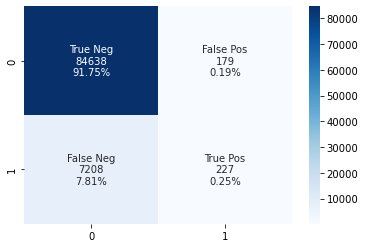

In [392]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

### Seuil optimal pour la courbe ROC

In [393]:
y_pred_prob=lgbm_clf.predict_proba(X_test)

In [394]:
def tune_threshold(true_labels, predicted_probas):
    fpr, tpr, threshold = roc_curve(true_labels, predicted_probas)
    j_stat = tpr - fpr
    index_for_best_threshold = np.argmax(j_stat)

    return threshold[index_for_best_threshold]


def proba_to_class(proba, threshold):
     return np.where(proba >= threshold, 1, 0)

Garder les probabilités que pour le résultat positif

In [395]:
y_pred_1 = y_pred_prob[:, 1]

Calculer roc_curve pour obtenir le meilleur seuil

In [396]:
# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.081265


Graphique ROC pour le modèle avec la classification déséquilibrée avec le seuil optimal

Best Threshold=0.081265, G-Mean=0.711


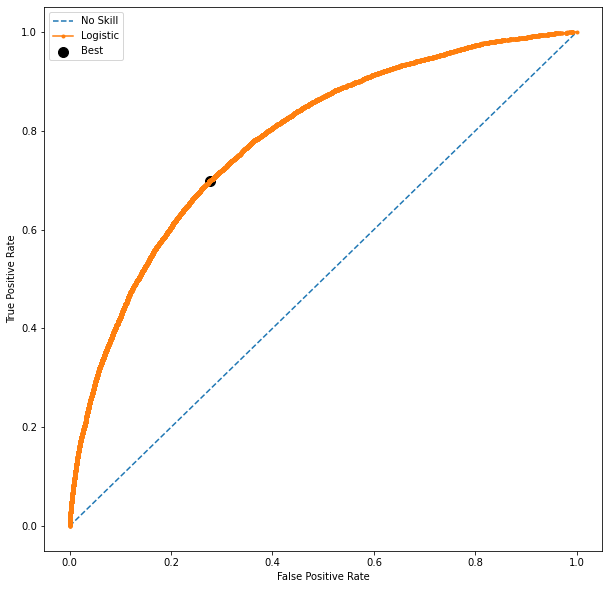

In [397]:
# Garder les probabilités que pour le résultat positif
y_pred_1 = y_pred_prob[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plt.figure(figsize=(10,10))
# calculer le g-mean pour chaque seuil
gmeans = sqrt(tpr * (1-fpr))
# Identifier l'index la plus grande g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# graphique roc curve du modèle
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# Afficher le graphique
pyplot.show()

Matrice de confusion

In [398]:
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

<AxesSubplot:>

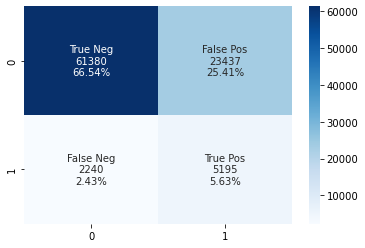

In [399]:
cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [400]:
y_test.value_counts()

0    84817
1     7435
Name: TARGET, dtype: int64

In [401]:
pd.DataFrame(thresh_roc).value_counts()

0    63620
1    28632
dtype: int64

Classification Report

In [402]:
print('Classification Report')
print(classification_report(y_test, thresh_roc))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     84817
           1       0.18      0.70      0.29      7435

    accuracy                           0.72     92252
   macro avg       0.57      0.71      0.56     92252
weighted avg       0.90      0.72      0.78     92252



In [403]:
print('LightGBM Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_score=thresh_roc, y_true = y_test)))

LightGBM Model ROCAUC score: 0.7112


### Seuil optimal pour la courbe de rappel de précision

Définir des seuils

In [103]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)

Evaluer chaque seuil

In [104]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.991188, F-Score=nan


invalid value encountered in true_divide


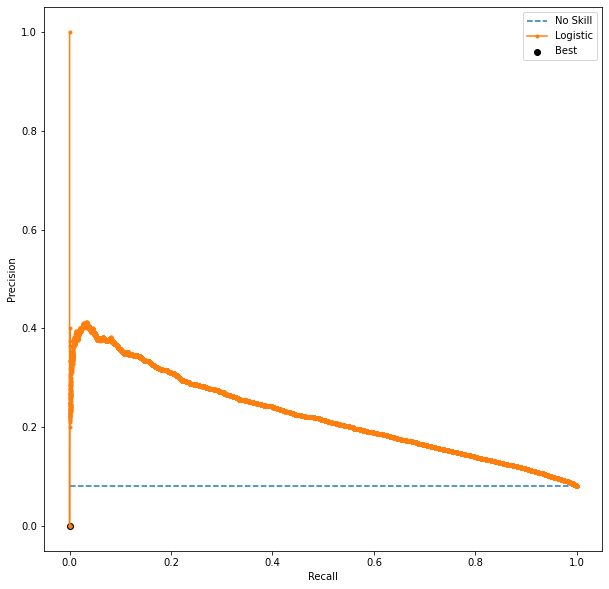

In [105]:
# plot the roc curve for the model
plt.figure(figsize=(10,10))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [106]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

<AxesSubplot:>

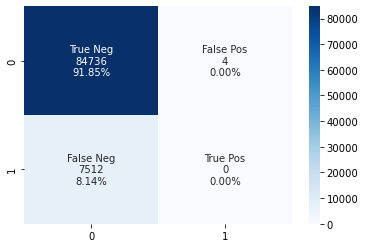

In [107]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Classification Report

In [108]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84740
           1       0.00      0.00      0.00      7512

    accuracy                           0.92     92252
   macro avg       0.46      0.50      0.48     92252
weighted avg       0.84      0.92      0.88     92252



In [109]:
print('LightGBM Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, thresh_precision_recall)))

LightGBM Model ROCAUC score: 0.5000


### Le seuil optimal Threshold Tuning

Définir des seuils

In [110]:
thresholds = arange(0, 1, 0.001)

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [111]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

Evaluer chaque seuil

In [112]:
scores = [f1_score(y_test, to_labels(y_pred_1, t)) for t in thresholds]

Obtenir le meilleur seuil

In [113]:
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.119, F-Score=0.30185


Graphique de rappel de précision pour le modèle avec le seuil optimal

Best Threshold=0.991188, F-Score=nan


invalid value encountered in true_divide


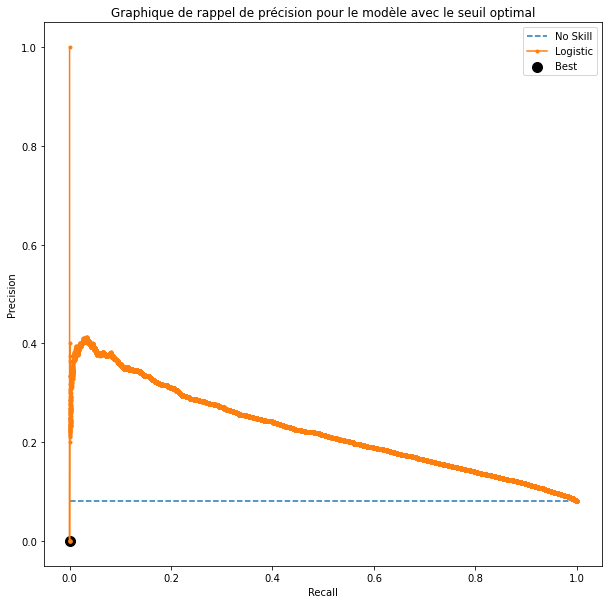

In [114]:
plt.figure(figsize=(10,10))
# Calculer roc curves
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)
# convertir en f score
fscore = (2 * precision * recall) / (precision + recall)
# Indentifier l'index du plus grand F-score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
#Graphique roc pour le modèle
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title("Graphique de rappel de précision pour le modèle avec le seuil optimal")
pyplot.legend()
# Afficher le graphique
pyplot.show()

Matrice de confusion

In [115]:
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

<AxesSubplot:>

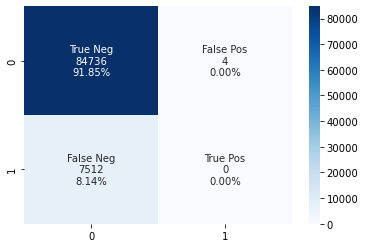

In [116]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Classification Report

In [118]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84740
           1       0.00      0.00      0.00      7512

    accuracy                           0.92     92252
   macro avg       0.46      0.50      0.48     92252
weighted avg       0.84      0.92      0.88     92252



Feature Importance

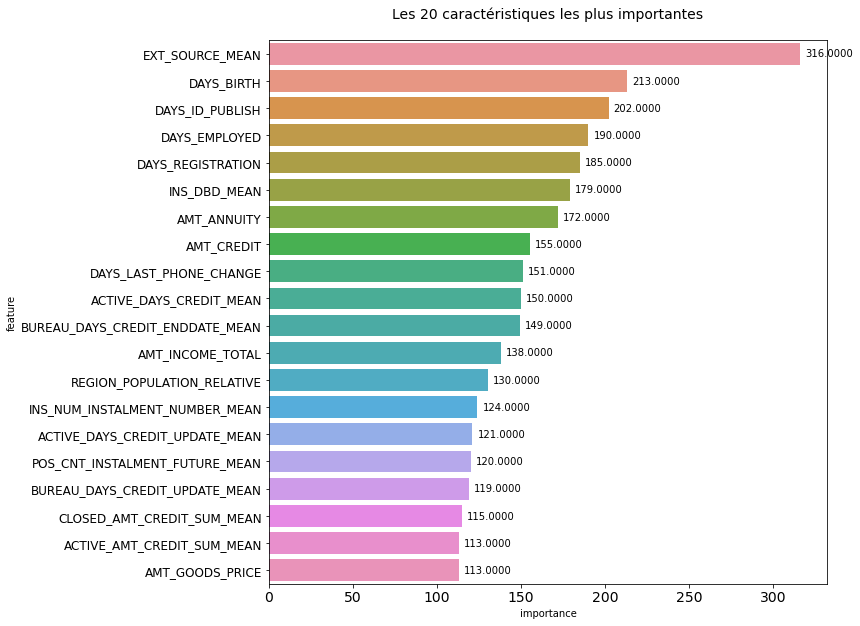

In [100]:
import warnings

feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = lgbm_clf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20])

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [101]:
feature_importance_df['feature'].head(30).values

array(['EXT_SOURCE_MEAN', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'INS_DBD_MEAN',
       'AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE',
       'ACTIVE_DAYS_CREDIT_MEAN', 'BUREAU_DAYS_CREDIT_ENDDATE_MEAN',
       'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
       'INS_NUM_INSTALMENT_NUMBER_MEAN', 'ACTIVE_DAYS_CREDIT_UPDATE_MEAN',
       'POS_CNT_INSTALMENT_FUTURE_MEAN', 'BUREAU_DAYS_CREDIT_UPDATE_MEAN',
       'CLOSED_AMT_CREDIT_SUM_MEAN', 'ACTIVE_AMT_CREDIT_SUM_MEAN',
       'AMT_GOODS_PRICE', 'PREV_AMT_ANNUITY_MEAN',
       'BUREAU_AMT_CREDIT_SUM_MEAN', 'PREV_APP_CREDIT_PERC_MEAN',
       'PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN',
       'PREV_HOUR_APPR_PROCESS_START_MEAN', 'INS_DPD_MEAN',
       'APPROVED_AMT_ANNUITY_MEAN', 'BUREAU_AMT_CREDIT_SUM_DEBT_MEAN',
       'CLOSED_DAYS_CREDIT_MEAN', 'APPROVED_SELLERPLACE_AREA_MEAN'],
      dtype=object)

SHAP Model interpretation

In [102]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(lgbm_clf, model_output='raw')
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Explainer expected value: -5.337731076349505


In [103]:
df_train1.shape

(301354, 287)

Résumez les impacts de toutes les features

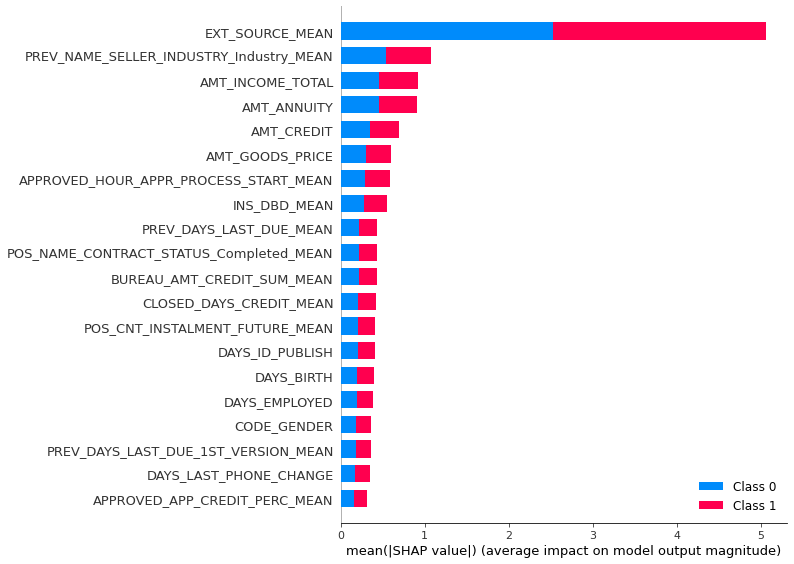

In [104]:
shap.summary_plot(shap_values, X_test)

Diagramme de décision

Les diagrammes de décision offrent une vue détaillée du fonctionnement interne d'un modèle ; c'est-à-dire qu'ils montrent comment les modèles prennent des décisions.

Il existe plusieurs cas d'utilisation d'un diagramme de décision.

1) Affichez clairement un grand nombre d'effets de fonctionnalités.

2) Visualisez les prédictions à sorties multiples.

3) Afficher l'effet cumulatif des interactions.

4) Explorez les effets de fonctionnalité pour une plage de valeurs de fonctionnalité.

5) Identifier les valeurs aberrantes.

6) Identifier les chemins de prédiction typiques.

7) Comparez et contrastez les prédictions de plusieurs modèles.

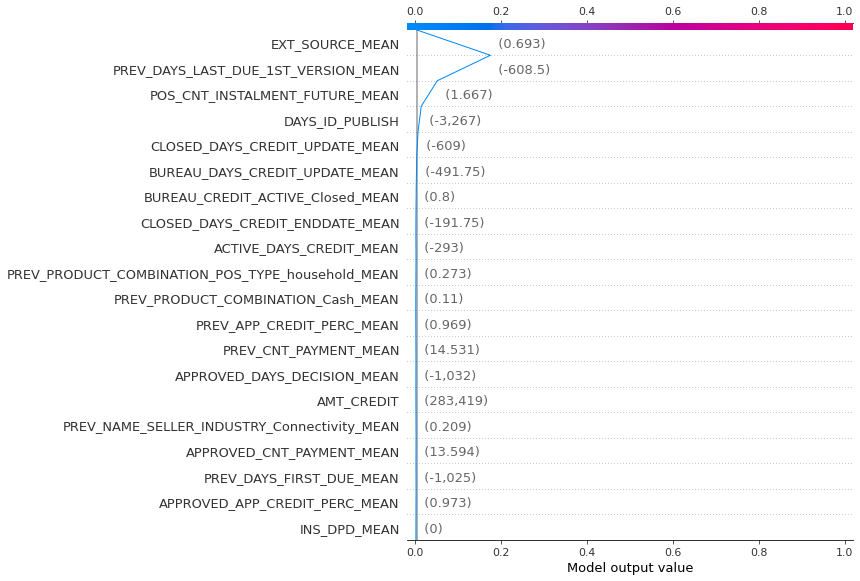

In [105]:
row = 30
# pred = lgbm_clf.predict_proba(X_test.iloc[row].values.reshape(1, -1))
# print(f"Actutal Outcome is {y_test.iloc[row]}")
# print(f"Predicted Outcome is {np.argmax(pred)}")

shap.decision_plot(base_value = expected_value, 
                   shap_values=shap_values[0][row], 
                   features = X_test, 
                   feature_names=X_test.columns.tolist(),
                   link='logit')

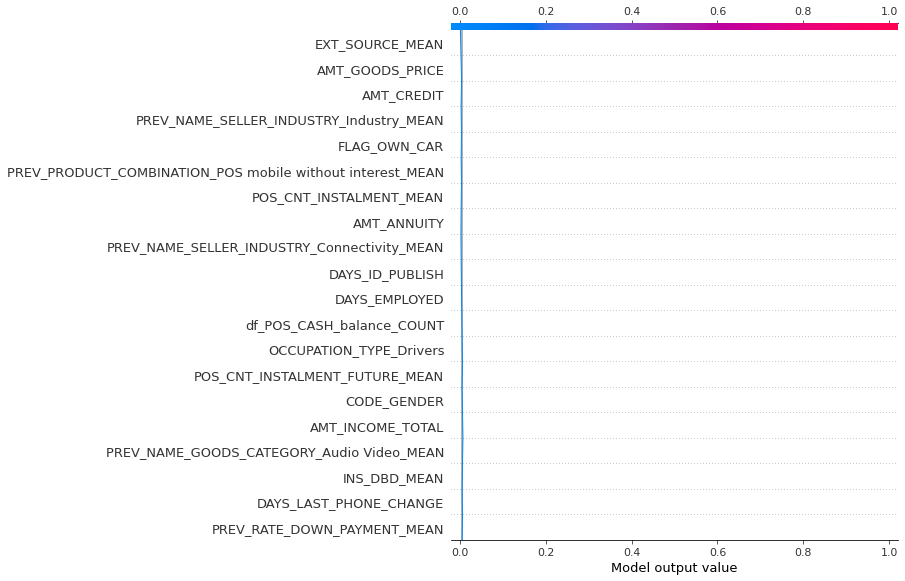

In [106]:
shap.decision_plot(expected_value, shap_values[0][20], X_test.columns.tolist(), link='logit')

In [107]:
shap.force_plot(explainer.expected_value[0], shap_values[0][20],X_train.iloc[0,:])

In [108]:
shap.force_plot(explainer.expected_value[1], shap_values[1][20],X_train.iloc[0,:])

**Suréchantillonnage aléatoire**

Le suréchantillonnage peut être défini comme l'ajout de plus de copies à la classe minoritaire. Le suréchantillonnage peut être un bon choix lorsque vous n'avez pas une tonne de données avec lesquelles travailler.

Un inconvénient à prendre en compte lors du sous-échantillonnage est qu'il peut entraîner un surajustement et une mauvaise généralisation de votre ensemble de test.

## Méthode 1 : SMOTE

In [145]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10,shuffle=df_train1['TARGET'])

In [111]:
smote = SMOTE(sampling_strategy='minority')

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

y_smote.value_counts()

0    221854
1    221854
Name: TARGET, dtype: int64

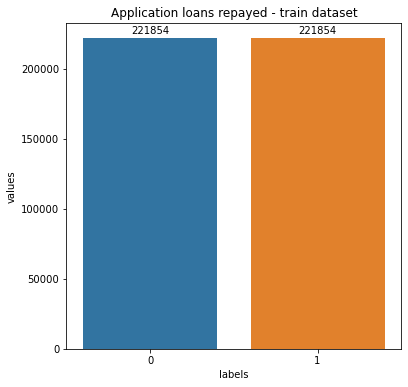

In [112]:
temp = y_smote.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

In [113]:
lgbm_clf = lgbm.LGBMClassifier(nthread=4,
                               n_estimators=500,
                               learning_rate=0.01,
                               num_leaves=40,
                               colsample_bytree=0.9497036,
                               subsample=0.8715623,
                               max_depth=8,
                               reg_alpha=0.041545473,
                               reg_lambda=0.0735294,
                               min_split_gain=0.0222415,
                               min_child_weight=39.3259775,
                               silent=-1,
                               verbose=-1
                              )

In [114]:
lgbm_clf.fit(x_smote, y_smote)

'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


LGBMClassifier(colsample_bytree=0.9497036, learning_rate=0.01, max_depth=8,
               min_child_weight=39.3259775, min_split_gain=0.0222415,
               n_estimators=500, nthread=4, num_leaves=40,
               reg_alpha=0.041545473, reg_lambda=0.0735294, silent=-1,
               subsample=0.8715623, verbose=-1)

Prédire le résultat sur les données X_test

In [115]:
y_pred=lgbm_clf.predict(X_test)
# y_pred=lgbm_clf.predict_proba(X_test)

In [116]:
# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9195


<AxesSubplot:>

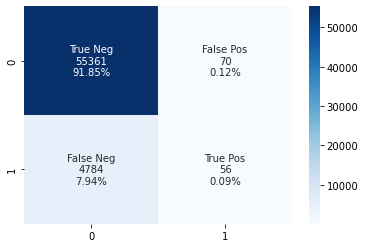

In [117]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [118]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     55431
           1       0.44      0.01      0.02      4840

    accuracy                           0.92     60271
   macro avg       0.68      0.51      0.49     60271
weighted avg       0.88      0.92      0.88     60271



## Méthode 2 : Oversampling

In [119]:
# nombre de classes
target_count_0, target_count_1 = df_train1['TARGET'].value_counts()

# Classe séparée
target_0 = df_train1[df_train1['TARGET'] == 0]
target_1 = df_train1[df_train1['TARGET'] == 1] # affiche la forme de la classe
print('target 0 :', target_0.shape)
print('target 1 :', target_1.shape)

target 0 : (277285, 287)
target 1 : (24069, 287)


In [120]:
# Oversample 1-class and concat the DataFrames of both classes
# class_1_over = target_1.sample(int(target_count_0/3), replace=True)
class_1_over = target_1.sample(target_count_0, replace=True)
test_over = pd.concat([target_0, class_1_over], axis=0)

print('Random over-sampling:')
print(test_over.TARGET.value_counts(normalize=True))

Random over-sampling:
0    0.5
1    0.5
Name: TARGET, dtype: float64


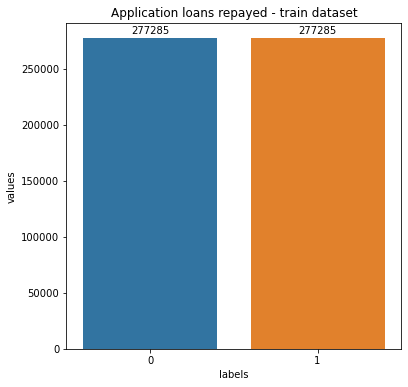

In [121]:
temp = test_over['TARGET'].value_counts()
df = pd.DataFrame({'labels': temp.index,
#                    'values': (temp.values/temp.sum())*100
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

In [122]:
X = test_over.iloc[ :, 2:]
y = test_over.iloc[ :,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [123]:
import lightgbm as lgbm
lgbm_clf = lgbm.LGBMClassifier()

# lgbm_clf = lgbm.LGBMClassifier(nthread=4,
#                                n_estimators=500,
#                                learning_rate=0.01,
#                                num_leaves=40,
#                                colsample_bytree=0.9497036,
#                                subsample=0.8715623,
#                                max_depth=8,
#                                reg_alpha=0.041545473,
#                                reg_lambda=0.0735294,
#                                min_split_gain=0.0222415,
#                                min_child_weight=39.3259775,
#                                silent=-1,
#                                verbose=-1
#                               )

In [124]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier()

Prédire le résultat sur les données X_test

In [125]:
y_pred=lgbm_clf.predict(X_test)
# y_pred=lgbm_clf.predict_proba(X_test)

In [126]:
# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7327


<AxesSubplot:>

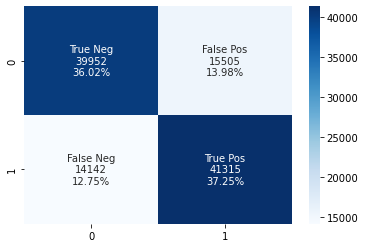

In [127]:
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [128]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     55457
           1       0.73      0.74      0.74     55457

    accuracy                           0.73    110914
   macro avg       0.73      0.73      0.73    110914
weighted avg       0.73      0.73      0.73    110914



## Méthode 3 : Undersampling

In [129]:
# Undersample 0-class and concat the DataFrames of both class
target_0_under = target_0.sample(target_count_1)
test_under = pd.concat([target_0_under, target_1], axis=0)

print('Random under-sampling:')
print(test_under.TARGET.value_counts())

Random under-sampling:
0    24069
1    24069
Name: TARGET, dtype: int64


In [130]:
X = test_under.iloc[ :, 2:]
y = test_under.iloc[ :,1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [131]:
# Number of classes in training Data
y_train.value_counts()

1    19255
0    19255
Name: TARGET, dtype: int64

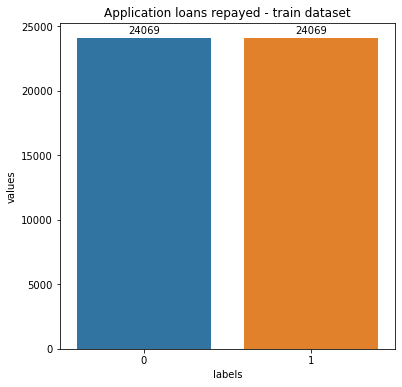

In [132]:
temp = test_under['TARGET'].value_counts()
df = pd.DataFrame({'labels': temp.index,
#                    'values': (temp.values/temp.sum())*100
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

In [133]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier()

In [134]:
# pk.dump(lgbm_clf, open("lgbm_clf.pkl","wb"))

Prédire le résultat sur les données X_test

In [135]:
y_pred=lgbm_clf.predict(X_test)
# y_pred=lgbm_clf.predict_proba(X_test)

In [136]:
# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6890


<AxesSubplot:>

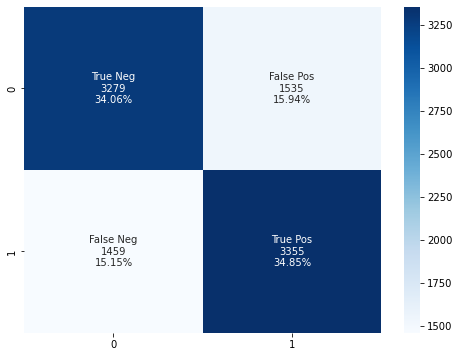

In [137]:
plt.figure(figsize = (8,6))
cm = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [138]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      4814
           1       0.69      0.70      0.69      4814

    accuracy                           0.69      9628
   macro avg       0.69      0.69      0.69      9628
weighted avg       0.69      0.69      0.69      9628



In [139]:
print('LightGBM Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred)))

LightGBM Model ROCAUC score: 0.6890


In [140]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(lgbm_clf, model_output='raw')
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

Explainer expected value: -0.0011471600793606963


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Summarize the effects of all the features

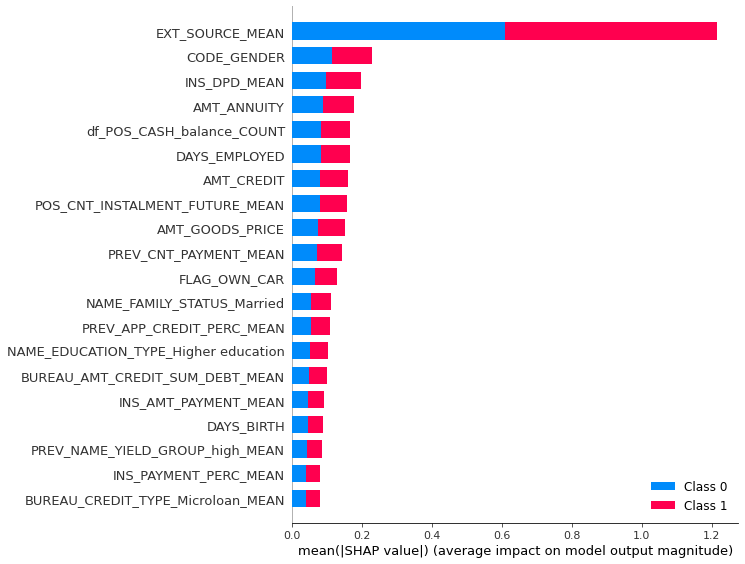

In [141]:
shap.summary_plot(shap_values, X_test)

In [142]:
vals= np.abs(shap_values).mean(0)[0]
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head(20)

col_name  feature_importance_vals
78                        EXT_SOURCE_MEAN                 0.704634
269             APPROVED_AMT_ANNUITY_MEAN                 0.145067
11                          DAYS_EMPLOYED                 0.143242
132                          INS_DPD_MEAN                 0.113261
7                             AMT_ANNUITY                 0.111303
1                             CODE_GENDER                 0.099135
119        POS_CNT_INSTALMENT_FUTURE_MEAN                 0.079144
134                 INS_PAYMENT_PERC_MEAN                 0.073696
12                      DAYS_REGISTRATION                 0.071959
6                              AMT_CREDIT                 0.071803
140             PREV_APP_CREDIT_PERC_MEAN                 0.066635
135                 INS_PAYMENT_DIFF_MEAN                 0.059561
131                  INS_AMT_PAYMENT_MEAN                 0.057846
84        BUREAU_AMT_CREDIT_SUM_DEBT_MEAN                 0.056667
129           INS_DAYS_ENTRY_PAYMENT_MEAN                 0.050527
141            PREV_AMT_DOWN_PAYMENT_MEAN                 0.050208
146                 PREV_CNT_PAYMENT_MEAN                 0.049063
40   NAME_EDUCATION_TYPE_Higher education                 0.048706
27              AMT_REQ_CREDIT_BUREAU_QRT                 0.046438
59            OCCUPATION_TYPE_Sales staff                 0.043217

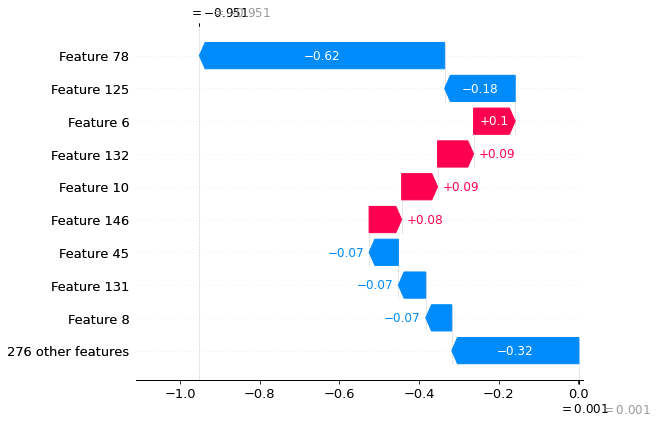

In [143]:
# len(shap_values)
# # shap_values[9000]
# shap_values
# base_values = shap_values.base_values
# shap.plots.waterfall(shap_values)

# shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0][0])
vals= shap_values[0][1]
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head(20)
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][1])